Descripción de las columnas del dataset

1. ```Age```: La edad del empleado.

2. ```Attrition```: Indica si el empleado ha dejado la empresa ("No" significa que no ha dejado la empresa y "Yes" significa que ha dejado la empresa).

3. ```BusinessTravel```: Describe la frecuencia de los viajes relacionados con el trabajo del empleado (por ejemplo, "Travel_Rarely" para raramente).

4. ```DailyRate```: La tarifa diaria del empleado.

5. ```Department```: El departamento en el que trabaja el empleado (por ejemplo, "Research & Development", "Sales", etc.).

6. ```DistanceFromHome```: La distancia desde el hogar del empleado hasta su lugar de trabajo.

7. ```Education```: Nivel de educación del empleado (generalmente en una escala del 1 al 5).

8. ```EducationField```: El campo de educación del empleado.

9. ```EmployeeCount```: Un contador que generalmente es 1 y se usa para contar empleados.

10. ```EmployeeNumber```: Un número de identificación único para el empleado.

11. ```EnvironmentSatisfaction```: Nivel de satisfacción del empleado en relación con su entorno de trabajo. Con valores que estan comprendidos entre el 1 y el 4, siendo el 4 el nivel de máxima satisfacción.

12. ```Gender```: El género del empleado. Donde 0 corresponde con "hombre" y 1 con "mujer".

13. ```HourlyRate```: La tarifa por hora del empleado.

14. ```JobInvolvement```: Nivel de implicación del empleado en su trabajo.

15. ```JobLevel```: Nivel jerárquico del empleado en la empresa.

16. ```JobRole```: El rol o puesto de trabajo del empleado.

17. ```JobSatisfaction```: Nivel de satisfacción del empleado con su trabajo.

18. ```MaritalStatus```: El estado civil del empleado (por ejemplo, "Single", "Married", etc.).

19. ```MonthlyIncome```: Ingresos mensuales del empleado.

20. ```MonthlyRate```: Tasa mensual del empleado.

21. ```NumCompaniesWorked```: Número de compañías en las que el empleado ha trabajado.

22. ```Over18```: Indica si el empleado es mayor de 18 años.

23. ```OverTime```: Indica si el empleado trabaja horas extras ("Yes" para sí o "No" para no).

24. ```PercentSalaryHike```: El porcentaje de aumento salarial del empleado.

25. ```PerformanceRating```: Calificación de rendimiento del empleado.

26. ```RelationshipSatisfaction```: Nivel de satisfacción en las relaciones interpersonales del empleado.

27. ```StandardHours```: Las horas estándar de trabajo.

28. ```StockOptionLevel```: Nivel de opciones de compra de acciones del empleado.

29. ```TotalWorkingYears```: Total de años de experiencia laboral del empleado.

30. ```TrainingTimesLastYear```: Número de veces que el empleado recibió capacitación el año pasado.

31. ```WorkLifeBalance```: Equilibrio entre trabajo y vida personal del empleado.

32. ```YearsAtCompany```: Años que el empleado ha trabajado en la empresa actual.

33. ```YearsInCurrentRole```: Años que el empleado ha estado en su puesto actual.

34. ```YearsSinceLastPromotion```: Años desde la última promoción del empleado.

35. ```YearsWithCurrManager```: Años que el empleado ha estado bajo la supervisión del actual gerente.

36. ```SameAsMonthlyIncome```: Ingresos mensuales del empleado.

37. ```DateBirth```: Año de nacimiento del empleado (teniendo en cuenta que los datos fueron recogidos en el 2023)

38. ```Salary```: Salario de los empleados.

39. ```RoleDepartament```: El departamento y el rol del empleado.

40. ```NumberChildren```: Número de hijos de los empleados.

41. ```RemoteWork```: Si el empleado puede teletrabajar o no.

# Fase 1. Exploración de los datos

# 1.1 Exploración preliminar

In [745]:
# Cargamos las librerías de tratamiento de datos y configuramos los DataFrames para que se muestren todas las columnas
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Importamos librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos librerías para pruebas estadísticas
import scipy.stats as stats
from scipy.stats import shapiro, kstest, ttest_ind, mannwhitneyu, expon, chisquare

In [746]:
# import libraries for imputation using advanced statistical methods
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [747]:
# Leemos el archivo con los datos
# Especificamos que el primer valor de cada fila es el índice de la columna

df = pd.read_csv('data/HR RAW DATA.csv', index_col=0)

# Comenzamos la inspección visual con los primeros 5 registros
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [748]:
# Las columnas están ordenadas alfabéticamente.Vamos a ordenar el DataFrame de forma que sea más fácil comprender los datos y 
# encontrar patrones visualmente.

# Obtenemos la lista de columnas del DataFrame
columns_list= list(df.columns)

print(F'El DataFrame contiene {len(columns_list)} columnas')


El DataFrame contiene 41 columnas


In [749]:
# Ordenamos las columnas por categorías: número de empleado, datos personales, papel en la empresa, nivel de 
# desempeño, permanencia y nivel de satisfacción, salario y beneficios, subidas, tiempos en la empresa y varios.

columnas_ordenadas = [
    'employeenumber', 
    'Age', 'Over18', 'DateBirth', 'Gender', 'MaritalStatus', 'Education', 'EducationField', 'NUMBERCHILDREN', 'NUMCOMPANIESWORKED',
    'JobLevel', 'JobRole', 'Department', 'RoleDepartament',
    'JobInvolvement', 'PerformanceRating',
    'Attrition','JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction', 'WORKLIFEBALANCE', 
    'HourlyRate', 'DailyRate', 'MonthlyRate', 'MonthlyIncome', 'SameAsMonthlyIncome', 'Salary', 'StockOptionLevel', 
    'PercentSalaryHike', 
    'YearsAtCompany', 'TOTALWORKINGYEARS','YearsInCurrentRole', 'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER', 
    'TrainingTimesLastYear', 'BusinessTravel', 'DistanceFromHome', 'StandardHours', 'OverTime', 'RemoteWork',
    'employeecount'
]

# Comprobamos que están todas las columnas

for item in columns_list:
    if item in columnas_ordenadas:
        pass
    else:
        print(f'La columna {item} no está en la lista')

In [750]:
# Modificamos el DataFrame para que muestre las columnas en el orden que deseamos
df = df[columnas_ordenadas]
df.head()


## Comprobación:
# 'Education' y 'EducationField': comprobar si están relacionados.
# 'JobLevel' y 'JobRole': Research Director está asociado a JobLevel 5 y 4. ¿Eso tiene sentido?
# 'employeecount': un contador es innecesario. Si solo contiene el valor 1 se puede eliminar.
# 'DailyRate', 'HourlyRate' y 'MonthlyRate' no sabemos lo que representan. Consultar al Product Owner.
# 'NumCompaniesWorked': ¿0 significa que esta es su primera empresa?
# 'YearsWithCurrManager': este valor en algunos casos es menor que YearsSinceLastPromotion lo que sginifica que ambos empleados 
# tuvieron que ser cambiados de puesto a la vez. Confirmar.
# 'TOTALWORKINGYEARS' no puede ser mayor que los años en el mismo puesto o que los años desde el último ascenso o yearsatcompany


## Limpieza:
# Los titulos de las columnas no son homogéneos: algunos con mayúsculas, otros todos en minúscula. Estandarizar.
# 'employeenumber': parace que es tipo float lo cual no tiene sentido. Además, contiene valores nulos a pesar de ser un número de 
# identificación.
# Age, Over18, DateBirth: son 3 valores relacionados. Si tenemos todas las edades nos quedaremos con la columna Age que es la que
# aporta más información puesto que con el año de nacimiento no se puede sacar la edad exacta (depende del día y mes de nacimiento
# que no los sabemos).
# Gender: cambiar 0 por 'male y 1 por 'female'.
# MaritalStatus: contiene valores nulos.
# EducationField: contiene nulos.
# NUMBERCHILDREN: contiene valores nulos.
# JobRole, Department y RoleDepartment: la columna RoleDepartment sobra puesto que tienen valores no atomizados y nulos. Además, 
# las columnas Job Role y Department ya contienen esta información. Comprobar que no necesitamos info de la columna 
# RoleDepartment antes de borrarla.
# JobRole: Se mezclan mayúsculas y minúsculas. Estandarizar.
# Departament: tiene valores nulos pero puede que lo podamos coger de RoleDepartment.
# RoleDepartment: eliminar.
# WORKLIFEBALANCE: contiene valores nulos y valores decimales.
# DailyRate: el valor no es atómico. Comprobar que se puede eliminar la moneda.
# MonthlyIncome y SameAsMonthlyIncome: inicialmente contienen los mismos valores así que una se podría eliminar.
# MonthlyIncome: hay valores nulos para empleados que no han dejado la empresa.
# Salary: parece que no tiene sentido. Comprobar si todos tienen el mismo valor y en ese caso eliminar.
# TOTALWORKINGYEARS: contiene valores nulos y valores decimales.
# YearsInCurrentRole y YearsSinceLastPromotion: estas columnas contienen la mismo info. YearsInCurrentRole además contiene 
# nulos. Eliminar una.
# BusinessTravel: contiene nulos.
# Standard Hours: hay valores nulos.
# OverTime: hay valores nulos.
# RemoteWork: consultar con el Product Owner. Valores inconsistentes.


## Análisis:
# Hacer 2 grupos para todo el análisis: Los que han dejado la empresa y los que no. Podremos así clasificar en 4 categorías:
# insatisfechos/satisfechos que permanecen, insatisfechos/satisfechos que se han marchado.
# ¿Hay relación entre el nivel de ingresos y el nivel de satisfacción con el trabajo?
# ¿Hay relación entre el nivel de educación y el nivel de satisfacción en el trabajo?
# ¿Hay relación entre la edad y el nivel de satisfacción en el trabajo?
# ¿Hay relación entre JobInvolvement y PerformanceRating?
# ¿Está WORKLIFEBALANCE relacionada con los niveles de satisfacción en el trabajo?


,employeenumber,Age,Over18,DateBirth,Gender,MaritalStatus,Education,EducationField,NUMBERCHILDREN,NUMCOMPANIESWORKED,JobLevel,JobRole,Department,RoleDepartament,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WORKLIFEBALANCE,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,SameAsMonthlyIncome,Salary,StockOptionLevel,PercentSalaryHike,YearsAtCompany,TOTALWORKINGYEARS,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,StandardHours,OverTime,RemoteWork,employeecount
0,"162,0",51,Y,1972,0,NaN,3,NaN,NaN,7,5,resEArch DIREcToR,NaN,NaN,3,"3,0",No,3,1,3,"3,0",51,"684,0$",6462,"19537,0","19537,0",1000000000$,0,13,20,NaN,NaN,15,15,5,NaN,6,NaN,No,Yes,1
1,"259,0",52,NaN,1971,0,NaN,4,Life Sciences,NaN,0,5,ManAGeR,NaN,NaN,2,"3,0",No,3,3,1,"3,0",65,"699,0$",5678,"19999,0","19999,0",1000000000$,1,14,33,"34,0",NaN,11,9,5,NaN,1,NaN,NaN,1,1
2,"319,0",42,NaN,1981,0,Married,2,Technical Degree,NaN,1,5,ManaGER,Research & Development,ManaGER - Research & Development,3,"3,0",No,4,3,4,NaN,58,"532,0$",4933,"19232,0","19232,0",1000000000$,0,11,22,"22,0",NaN,11,15,3,travel_rarely,4,NaN,No,1,1
3,NaN,47,Y,1976,1,Married,4,Medical,NaN,3,4,ReseArCH DIrECtOr,NaN,NaN,3,"3,0",No,3,1,2,NaN,82,"359,0$",26703,"17169,0","17169,0",1000000000$,2,19,20,NaN,NaN,5,6,2,travel_rarely,2,NaN,NaN,False,1
4,NaN,46,Y,1977,1,Divorced,3,Technical Degree,NaN,2,4,sAleS EXECUtIve,NaN,NaN,4,"3,0",No,1,1,4,"3,0",45,"1319,0$",7739,NaN,NaN,1000000000$,1,12,19,NaN,NaN,2,8,5,NaN,3,NaN,No,0,1


In [751]:
print(f'El tamaño del dataframe de datos es {df.shape[0]} filas y {df.shape[1]} columnas')

El tamaño del dataframe de datos es 1614 filas y 41 columnas


In [752]:
df.tail()

## Limpieza: 
#  DistanceFromHome contiene valores negativos
#  employeenumber: los valores deberían ser enteros

,employeenumber,Age,Over18,DateBirth,Gender,MaritalStatus,Education,EducationField,NUMBERCHILDREN,NUMCOMPANIESWORKED,JobLevel,JobRole,Department,RoleDepartament,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WORKLIFEBALANCE,HourlyRate,DailyRate,MonthlyRate,MonthlyIncome,SameAsMonthlyIncome,Salary,StockOptionLevel,PercentSalaryHike,YearsAtCompany,TOTALWORKINGYEARS,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,StandardHours,OverTime,RemoteWork,employeecount
1609,"967,0",36,Y,1987,0,Married,1,Life Sciences,NaN,1,3,saLEs ExeCUTiVe,NaN,NaN,2,NaN,Yes,4,3,1,"3,0",51,"530,0$",5518,"10325,0","10325,0",1000000000$,1,11,16,NaN,NaN,3,7,6,travel_rarely,3,NaN,NaN,0,1
1610,"972,0",45,NaN,1978,0,NaN,2,NaN,NaN,1,2,LAboRaTOry tECHNiCIAn,NaN,NaN,3,"3,0",No,2,3,2,"2,0",57,"805,0$",23163,"4447,0","4447,0",1000000000$,0,12,9,NaN,NaN,0,8,5,non-travel,4,NaN,NaN,1,1
1611,NaN,39,NaN,1984,0,Single,5,NaN,NaN,0,3,sAlES ExECUTivE,NaN,NaN,4,"3,0",No,3,13,4,"3,0",41,"903,0$",2560,NaN,NaN,1000000000$,0,18,8,"9,0",NaN,0,7,3,travel_rarely,-13,NaN,No,Yes,1
1612,"990,0",36,NaN,1987,0,Divorced,4,Technical Degree,NaN,4,2,SaLes ExecUtIVe,NaN,NaN,3,NaN,No,4,1,4,"3,0",84,"1229,0$",25952,NaN,NaN,1000000000$,2,13,7,"12,0",NaN,0,7,3,non-travel,8,NaN,No,True,1
1613,NaN,46,Y,1977,0,NaN,2,Medical,NaN,6,3,mAnUfactURInG DiRECTOr,NaN,NaN,3,"3,0",No,3,4,2,"3,0",75,"566,0$",24208,"10845,0","10845,0",1000000000$,1,13,8,NaN,NaN,0,7,3,NaN,7,NaN,NaN,0,1


## 1.2 Limpieza Preliminar

In [753]:
# Como el DataFrame está muy sucio hacemos una limpieza preliminar de todo lo que hemos detectado hasta el momento.

# Definimos una función que calcule el porcentaje de nulos en el DataFrame ya que la vamos a tener que utilizar en varias 
# ocasiones:

def porcentaje_nulos(df):

    # Calculamos el porcentaje de nulos
    porcentaje_nulos = round(df.isnull().sum() / df.shape[0] * 100, 2)
    
    # Creamos un nuevo DataFrame con los resultados
    nulos_df = pd.DataFrame(porcentaje_nulos, columns=['% Nulos'])
    
    # Filtramos las columnas que tienen nulos
    nulos_con_valores = nulos_df[nulos_df['% Nulos'] > 0]
    
    print("El porcentaje de nulos que tenemos en el DataFrame es ==>")
    return nulos_con_valores
    

In [754]:
# Obtenemos el porcentaje de nulos de cada columna
porcentaje_nulos(df)

# LIMPIEZA: la columna edad contiene todas las edades. Consultar con el Product Owner el sentido de las columnas 'Over18' y  
# 'DateBirth' para confirmar que se pueden eliminar.

# LIMPIEZA: 'NUMBERCHILDREN' solo contiene nulos así que se puede eliminar.

# Limpieza: columnas que contienen excesivos nulos (>15% 0 >30%): employeenumber, Over18, MaritalStatus, EducationField, 
# Department, RoleDepartament, MonthlyIncome, SameAsMonthlyIncome, TOTALWORKINGYEARS, YearsInCurrentRole, BusinessTravel, 
# StandardHours, OverTime. Todas estas columnas son susceptibles de ser eliminadas dado el alto contenido de nulos. En principio, 
# serán eliminadas si no son imprescindibles para el análisis. 

# LIMPIEZA: Eliminamos Department y Role Department puesto que contienen un 81% de nulos en una variable que no es 
# imprescindible para el análisis que nos piden. Confirmar con el Product Owner.

# Limpieza: MonthyIncome: porcentaje muy elevado de nulos en una variable imprescindible para el análisis. Consultar con el 
# Product Owner

# LIMPIEZA: TOTALWORKINGYEARS contiene un 33% de nulos en una variable que no es imprescindible para el análisis. Consultar con 
# el ProductOwner 

# LIMPIEZA: 'YearsInCurrentRole' tiene un 98% de nulos además de la misma información que la columna 'YearsSinceLastPromotion'.
# Eliminar

El porcentaje de nulos que tenemos en el DataFrame es ==>


,% Nulos
employeenumber,26.70
Over18,55.82
MaritalStatus,40.33
EducationField,46.16
NUMBERCHILDREN,100.00
Department,81.29
RoleDepartament,81.29
PerformanceRating,12.08
WORKLIFEBALANCE,6.69
MonthlyIncome,52.23


In [755]:
# Obtenemos las columnas con un único valor

for column in df.columns:
    if df[column].unique().size == 1:
        print(f'La columna {column} contiene un único valor')

# LIMPIEZA: Las columnas NUMBERCHILDREN, Salary y employeecount se pueden eliminar.

La columna NUMBERCHILDREN contiene un único valor
La columna Salary contiene un único valor
La columna employeecount contiene un único valor


In [756]:
# 'MonthlyIncome' y 'SameAsMonthlyIncome' contienen cada uno de ellos 52% de valores nulos. Comprobamos si las columnas 
# contienen los mismos valores para el mismo registro.

comparando_valores = df['MonthlyIncome'].equals(df['SameAsMonthlyIncome'])

print(f'¿Son iguales las columnas MonthlyIncome y SameAsMonthlyIncome?: {comparando_valores}')

# LIMPIEZA: La columna 'SameAsMonthlyIncome' se puede eliminar.

¿Son iguales las columnas MonthlyIncome y SameAsMonthlyIncome?: True


In [757]:
# Revisamos los valores que contienen algunas de las columnas con muchos nulos

lista = ['StandardHours', 'MaritalStatus', 'BusinessTravel', 'OverTime', 'EducationField', 'BusinessTravel']

for item in lista:
    print(f'Los valores de la columna {item} son {df[item].unique()}')
    print('-----------------------------------------------------------------------')

# 'StandardHours': No le encontramos sentido a los valores.
# 'MaritalStatus': Entendemos que la columna no aporta información relevante para el estudio.
# 'BusinessTravel': ¿Corresponden el 48% de nulos a los empleados que no viajan?
# 'EducationField': Si la tasa de rotación que estamos intentando evaluar es la de ABC Corporation (resumen: Con el objetivo de 
# reducir la rotación de empleados y mejorar la satisfacción en el trabajo la empresa ABC Corporation) que es una empresa de IA 
# y aprendizaje automático (¿Quién es ABC Corporation?: La empresa se distingue por tener un equipo multidisciplinario que 
# abarca expertos en UX/UI, marketing, analistas, científicos de datos y otros campos relevantes) estos campos de educación no 
# tienen ningún sentido. Pendiente 


Los valores de la columna StandardHours son [nan '80,0']
-----------------------------------------------------------------------
Los valores de la columna MaritalStatus son [nan 'Married' 'Divorced' 'Single' 'divorced' 'Marreid']
-----------------------------------------------------------------------
Los valores de la columna BusinessTravel son [nan 'travel_rarely' 'travel_frequently' 'non-travel']
-----------------------------------------------------------------------
Los valores de la columna OverTime son ['No' nan 'Yes']
-----------------------------------------------------------------------
Los valores de la columna EducationField son [nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources']
-----------------------------------------------------------------------
Los valores de la columna BusinessTravel son [nan 'travel_rarely' 'travel_frequently' 'non-travel']
-----------------------------------------------------------------------


In [758]:
# Tras hablar con el Product Owner confirmamos que:

## COLUMNAS A ELIMINAR:
# LIMPIEZA: las columnas 'Over18'y 'DateBirth' no contienen información relevante. Eliminar.
# LIMPIEZA: la columna 'Role Department' se puede eliminar.
# LIMPIEZA: las columnas 'DailyRate', 'HourlyRate' y 'MonthlyRate' no contienen información relevante para el análisis. Eliminar.
# LIMPIEZA: las columnas 'StandardHours' no contienen información relevante para el análisis. Eliminar.
# LIMPIEZA: La columna 'SameAsMonthlyIncome' se puede eliminar.
# LIMPIEZA: Las columnas 'Salary' y 'employeecount' se pueden eliminar.
# LIMPIEZA: 'NUMBERCHILDREN' se puede eliminar.
# LIMPIEZA: Podemos eliminar 'Marital Status' pues no aporta nada relevante al análisis.
# LIMPIEZA: Eliminar "YearsInCurrentRole".
# LIMPIEZA: Eliminar TOTALWORKINGYEARS pues no añade información relevante.


## IMPUTACIONES SIMPLES
# LIMPIEZA: 'employeenumber': los números de los que disponemos de los empleados son correctos (salvo porque son un número decimal).
# Imputar 'Unknown a los nulos'.
# LIMPIEZA: A pesar del alto contenido de nulos en la columna 'Department' queremos conservar el dato. Imputar 'Unknown' a los 
# que estén vacíos.
# LIMPIEZA: 'RemoteWork': sustituir 1 y True por 'Yes' y 0 y No por 'No'.
# LIMPIEZA: Los nulos de 'BusinessTravel' corresponde a los empleados que no viajan. Imputar 'non-travel' a los nulos.
# LIMPIEZA: Los nulos de OverTime se corresponden con 'No'.
# LIMPIEZA: Los valores negativos de 'DistanceFromHome' son en realidad valores positivos. Convertirlos


## IMPUTACIONES AVANZADAS
# LIMPIEZA: No disponemos de más datos para 'WorkLifeBalance' así que tendremos que imputarlos.
# LIMPIEZA: No disponemos de más datos para 'PerformanceRating' así que tendremos que imputarlos.
# LIMPIEZA: No disponemos de más datos para 'MonthlyIncome' así que tendremos que imputarlos.


## INFORMACIÓN ADICIONAL
# 'JobLevel' y 'JobRole': existen distintos JobLevel para un mismo JobRole.
# 'NumCompaniesWorked': 0 significa que esta es su primera empresa.
# 'YearsWithCurrManager' y 'YearsSinceLastPromotion': jefe y empleado pueden ser cambiados de puesto a la vez. 


## PENDIENTES
# Resolver el campo de 'EducationField' (tiene un 46% de nulos y unos perfiles de educación que no encaja con la descripción de 
# ABC Corporation).



In [759]:
# Eliminamos todas las columnas indicadas anteriormente: 

cols=["Over18", "DateBirth", "NUMBERCHILDREN", "RoleDepartament", "HourlyRate", "DailyRate", "MonthlyRate", 
      "SameAsMonthlyIncome", "Salary", "StandardHours", "employeecount","TOTALWORKINGYEARS" , "YearsInCurrentRole", 
      "MaritalStatus"]

df.drop(labels=cols, axis=1, inplace=True)

df.head(2)

# PENDIENTE: EDUCATIONFIELD

,employeenumber,Age,Gender,Education,EducationField,NUMCOMPANIESWORKED,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WORKLIFEBALANCE,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,0,3,NaN,7,5,resEArch DIREcToR,NaN,3,"3,0",No,3,1,3,"3,0","19537,0",0,13,20,15,15,5,NaN,6,No,Yes
1,"259,0",52,0,4,Life Sciences,0,5,ManAGeR,NaN,2,"3,0",No,3,3,1,"3,0","19999,0",1,14,33,11,9,5,NaN,1,NaN,1


In [760]:
print(f'Hemos eliminado {len(cols)} columnas')

Hemos eliminado 14 columnas


In [761]:
# Formateamos los encabezados: Pasamos "TOTALWORKINGYEARS", "WORKLIFEBALANCE", "NUMCOMPANIESWORKED", "YEARSWITHCURRMANAGER"al
# mismo formato que el resto de encabezados.

dicc_col = {"TOTALWORKINGYEARS": "TotalWorkingYears",
            "WORKLIFEBALANCE":"WorkLifeBalance",
            "NUMCOMPANIESWORKED": "NumCompaniesWorked",
            "YEARSWITHCURRMANAGER":"YearsWithCurrManager",
            'employeenumber':'EmployeeNumber'
            }
df.rename(columns=dicc_col, inplace=True)
df.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,0,3,NaN,7,5,resEArch DIREcToR,NaN,3,"3,0",No,3,1,3,"3,0","19537,0",0,13,20,15,15,5,NaN,6,No,Yes
1,"259,0",52,0,4,Life Sciences,0,5,ManAGeR,NaN,2,"3,0",No,3,3,1,"3,0","19999,0",1,14,33,11,9,5,NaN,1,NaN,1


In [762]:
# Estandarizamos el registro de RemoteWork

dicc_remwork = {'1': 'Yes', '0':'No', 'True': 'Yes', 'False': 'No', 'Yes': 'Yes', 'No': 'No'}

df["RemoteWork"] = df["RemoteWork"].map(dicc_remwork)

# # Comprobamos que solo tenemos dos categorías para Remote Work

df['RemoteWork'].unique()

array(['Yes', 'No'], dtype=object)

In [763]:
# Convertimos las distancias negativas a positivas. 

df['DistanceFromHome'] = df['DistanceFromHome'].abs()

# Comprobamos que no quedan valores negativos

df[df['DistanceFromHome'] < 0]['DistanceFromHome'].count()

0

In [764]:
## CONVERSION DE NULOS
# Convertimos los nulos de 'EmployeeNumber' a 'Unknown'
df['EmployeeNumber'] = df['EmployeeNumber'].fillna('Unknown')

# Convertimos los nulos de 'Department' a 'Unknown' 

df['Department'] = df['Department'].fillna('Unknown')

# Convertimos los nulos de 'BusinessTravel' a 'No' 

df['BusinessTravel'] = df['BusinessTravel'].fillna('non-travel')

# Convertimos los nulos de 'OverTime' a 'No'

df['OverTime'] = df['OverTime'].fillna('No')

# Comprobación de que estas variables ya no tienen nulos

porcentaje_nulos(df)


El porcentaje de nulos que tenemos en el DataFrame es ==>


,% Nulos
EducationField,46.16
PerformanceRating,12.08
WorkLifeBalance,6.69
MonthlyIncome,52.23


# 1.3 Exploración y limpieza

In [765]:
# Continuamos con la exploración. Iremos limpiando según vayamos detectanto elementos para limpiar, salvo en los casos en que 
# la limpieza requiera de un estudio detallado.

# Inspeccionamos una muestra al azar de 4 registros
df.sample(4)

# LIMPIEZA: 'Gender': Asignar 0 = Male y 1 = Female para mayor claridad.
# LIMPIEZA: Estandarizar los formatos de 'JobRole'



,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
728,"1045,0",45,1,2,NaN,3,4,maNAGer,Sales,3,"3,0",No,4,4,2,"4,0",NaN,1,13,9,1,1,4,non-travel,11,No,No
71,Unknown,50,1,5,Life Sciences,5,3,ReseArcH diReCtOr,Unknown,2,"3,0",No,1,4,3,"3,0",NaN,3,15,14,1,11,3,non-travel,17,No,No
1024,"1308,0",58,0,4,Life Sciences,1,1,reseARcH sCiEntiST,Unknown,3,"3,0",No,3,1,4,"3,0",NaN,2,12,2,2,2,3,non-travel,23,No,Yes
308,"446,0",33,0,3,NaN,3,2,saLes ExecUtivE,Unknown,2,"3,0",No,4,2,3,"2,0","4682,0",0,14,7,0,1,6,non-travel,10,No,No


In [766]:
# Imputamos "Gender", 0="Male", 1="Female"

gender_mapping = {0:"Male",1:"Female"}

df["Gender"] = df["Gender"].replace(gender_mapping)

# Comprobamos que los valores y el tipo son correctos

df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [767]:
# Formateamos 'JobRole': transformamos la cadena de texto a minúsculas, mayúscula la primera letra de cada palabra y 
# eliminamos los espacios antes y después de las palabras

df['JobRole']=df['JobRole'].apply(lambda x : x.lower().title().strip())

# Comprobamos que los valores y el tipo son correctos

df['JobRole'].unique()

array(['Research Director', 'Manager', 'Sales Executive',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Laboratory Technician',
       'Sales Representative', 'Human Resources'], dtype=object)

In [768]:
df.info()

# LIMPIEZA: Las siguientes columnas no contienen nulos y deberían ser de tipo numérico: 'Age'

# LIMPIEZA: Las siguientes columnas contienen nulos y deberían ser de tipo numérico: 'PerformanceRating' (int), 
# 'WorkLifeBalance' (int), 'MonthlyIncome' (float).





<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber            1614 non-null   object
 1   Age                       1614 non-null   object
 2   Gender                    1614 non-null   object
 3   Education                 1614 non-null   int64 
 4   EducationField            869 non-null    object
 5   NumCompaniesWorked        1614 non-null   int64 
 6   JobLevel                  1614 non-null   int64 
 7   JobRole                   1614 non-null   object
 8   Department                1614 non-null   object
 9   JobInvolvement            1614 non-null   int64 
 10  PerformanceRating         1419 non-null   object
 11  Attrition                 1614 non-null   object
 12  JobSatisfaction           1614 non-null   int64 
 13  EnvironmentSatisfaction   1614 non-null   int64 
 14  RelationshipSatisfaction  161

In [769]:
# Al intentar convertir 'Age' a integer nos avisa de la presencia de strings. Inspeccionamos los valores de 'Age' a ver qué 
# tenemos

df['Age'].unique()

# Tenemos valores escritos como cadenas de texto en lugar de números


array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', 'forty-seven', '53',
       '43', '60', '32', '37', '49', '39', '50', '44', '30',
       'fifty-eight', '29', '31', '54', '57', '27', 'thirty-six', '28',
       '26', 'fifty-five', '25', 'fifty-two', 'thirty-one', '24',
       'thirty', '23', '22', '21', '20', 'twenty-six', '19',
       'thirty-seven', '18', 'thirty-two', 'twenty-four'], dtype=object)

In [770]:
# Sustituimos los números escritos por sus equivalentes numéricos

number_mapping = {
    'forty-seven': 47,
    'fifty-eight':58,
    'thirty-six':36,
    'fifty-five':55,
    'fifty-two':52,
    'thirty-one': 31,
    'thirty':30,
    'twenty-six': 26,
    'thirty-seven':37,
    'thirty-two':32,
    'twenty-four':24
}
df["Age"]= df["Age"].replace(number_mapping)

# Comprobamos que solo tenemos números en el DataFrame

df["Age"].unique()

# Los valores son correctos pero de tipo object

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', 47, '53', '43', '60',
       '32', '37', '49', '39', '50', '44', '30', 58, '29', '31', '54',
       '57', '27', 36, '28', '26', 55, '25', 52, 31, '24', 30, '23', '22',
       '21', '20', 26, '19', 37, '18', 32, 24], dtype=object)

In [771]:
# Convertimos 'Age' a tipo numérico

df['Age']=df['Age'].astype('int64')

# Comprobamos que el tipo es correcto

df['Age'].dtype


dtype('int64')

In [772]:
# Convertimos las columnas tipo object con nulos que deberían ser numéricas a tipo int salvo EmployeeNumber dado que contiene el
# valor Unknown
# Sustituimos las "," por "." en las variables de interés y las convertimos a numéricas.
comma_list = ["WorkLifeBalance", "PerformanceRating", "MonthlyIncome"]

for col in comma_list:
    df[col] = df[col].str.replace(",",".")
    df[col] = pd.to_numeric(df[col], errors="coerce")
    

In [773]:
# Convertimos "WorkLifeBalance", "PerformanceRating" a tipo int. EmployeeNumber no se puede convertir dado que contiene el
# valor Unknown

comma_list = ["WorkLifeBalance", "PerformanceRating"]

for col in comma_list:
    df[col] = df[col].astype('Int64')

In [774]:
# Visualizamos el DataFrame a ver cómo va quedando
df.sample(2)


,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
1550,Unknown,32,Female,4,Medical,7,2,Research Scientist,Unknown,4,3,No,4,1,3,2,5055.0,0,16,7,0,7,0,non-travel,2,No,No
781,"1947,0",28,Male,3,Medical,1,1,Research Scientist,Unknown,3,3,No,3,3,3,2,2144.0,0,14,5,1,4,3,non-travel,16,No,Yes


In [775]:
# Obtenemos las columnas de nuestro DataFrame

df.columns

Index(['EmployeeNumber', 'Age', 'Gender', 'Education', 'EducationField',
       'NumCompaniesWorked', 'JobLevel', 'JobRole', 'Department',
       'JobInvolvement', 'PerformanceRating', 'Attrition', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance', 'MonthlyIncome', 'StockOptionLevel',
       'PercentSalaryHike', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TrainingTimesLastYear', 'BusinessTravel',
       'DistanceFromHome', 'OverTime', 'RemoteWork'],
      dtype='object')

In [776]:
# Visualizamos los valores que contienen las columnas con un número de valores discretos limitados (excluidos EmployeeNumber y
# MonthlyIncome)

columnas_discretas = ['Age', 'Gender', 'Education', 'EducationField',
       'NumCompaniesWorked', 'JobLevel', 'JobRole', 'Department',
       'JobInvolvement', 'PerformanceRating', 'Attrition', 'JobSatisfaction',
       'EnvironmentSatisfaction', 'RelationshipSatisfaction',
       'WorkLifeBalance', 'StockOptionLevel',
       'PercentSalaryHike', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'TrainingTimesLastYear', 'BusinessTravel',
       'DistanceFromHome', 'OverTime', 'RemoteWork']

for column in columnas_discretas:
    print(f'Los valores de la columna {column} son:')
    print(df[column].unique())
    print('------------------------------------------')

# LIMPIEZA: 
# 'Department': limpiar los espacios antes y después de cada campo.
# 'EnvironmentSatisfaction': el rango de valores no es correcto. Deberían estar entre 1 y 4 y hay valores hasta el 49 

Los valores de la columna Age son:
[51 52 42 47 46 48 59 41 56 38 55 40 58 35 45 33 36 34 53 43 60 32 37 49
 39 50 44 30 29 31 54 57 27 28 26 25 24 23 22 21 20 19 18]
------------------------------------------
Los valores de la columna Gender son:
['Male' 'Female']
------------------------------------------
Los valores de la columna Education son:
[3 4 2 1 5]
------------------------------------------
Los valores de la columna EducationField son:
[nan 'Life Sciences' 'Technical Degree' 'Medical' 'Other' 'Marketing'
 'Human Resources']
------------------------------------------
Los valores de la columna NumCompaniesWorked son:
[7 0 1 3 2 4 8 9 5 6]
------------------------------------------
Los valores de la columna JobLevel son:
[5 4 3 2 1]
------------------------------------------
Los valores de la columna JobRole son:
['Research Director' 'Manager' 'Sales Executive' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Laboratory Technician'
 'Sales Representat

In [777]:
# Eliminamos los espacios en blanco al principio y al final de cada campo relleno de Department

df['Department']=df['Department'].apply(lambda x : x.strip())

# Comprobamos que los valores de las columnas son correctos

df['Department'].unique()

array(['Unknown', 'Research & Development', 'Sales', 'Human Resources'],
      dtype=object)

In [778]:
# Comprobamos de nuevo que los tipo de datos son correctos

df.info()

# Los tipos de datos son correctos

<class 'pandas.core.frame.DataFrame'>
Index: 1614 entries, 0 to 1613
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1614 non-null   object 
 1   Age                       1614 non-null   int64  
 2   Gender                    1614 non-null   object 
 3   Education                 1614 non-null   int64  
 4   EducationField            869 non-null    object 
 5   NumCompaniesWorked        1614 non-null   int64  
 6   JobLevel                  1614 non-null   int64  
 7   JobRole                   1614 non-null   object 
 8   Department                1614 non-null   object 
 9   JobInvolvement            1614 non-null   int64  
 10  PerformanceRating         1419 non-null   Int64  
 11  Attrition                 1614 non-null   object 
 12  JobSatisfaction           1614 non-null   int64  
 13  EnvironmentSatisfaction   1614 non-null   int64  
 14  RelationshipS

In [779]:
# Obtenemos los principales estadísticos de las columnas de tipo numérico

round(df.describe(), 2).T

# Nada claramente anómalo aparte de lo que ya habíamos encontrado anteriormente (EnvironmentSatisfaction hasta 49)que hace que
# la media de la misma sea anormalmente alta
# Las subidas salariales son muy elevadas
# Hay trabajadores que llevan trabajando 40 años en la empresa
# Hay trabajadores que llevan 17 años sin promocionar
# Los empleados permanecen como media 7 años en la compañía y al menos el 50% de ellos permanecen al menos 5 años.


,count,mean,std,min,25%,50%,75%,max
Age,1614.0,36.92,9.1,18.0,30.0,36.0,43.0,60.0
Education,1614.0,2.93,1.02,1.0,2.0,3.0,4.0,5.0
NumCompaniesWorked,1614.0,2.67,2.51,0.0,1.0,2.0,4.0,9.0
JobLevel,1614.0,2.07,1.1,1.0,1.0,2.0,3.0,5.0
JobInvolvement,1614.0,2.74,0.71,1.0,2.0,3.0,3.0,4.0
PerformanceRating,1419.0,3.15,0.36,3.0,3.0,3.0,3.0,4.0
JobSatisfaction,1614.0,2.74,1.11,1.0,2.0,3.0,4.0,4.0
EnvironmentSatisfaction,1614.0,4.29,6.99,1.0,2.0,3.0,4.0,49.0
RelationshipSatisfaction,1614.0,2.7,1.08,1.0,2.0,3.0,4.0,4.0
WorkLifeBalance,1506.0,2.76,0.7,1.0,2.0,3.0,3.0,4.0


In [780]:
# Obtenemos los diferentes estadísticos para las variables categóricas
df.describe(include=object).T

# La proporciçón de hombres en la empresa es mayor
# El porcentaje de empleados que han dejado la empresa es elevado. 
# Muchos empleados disfrutan de teletrabajo

# NO TENEMOS FORMA DE SABER EN QUÉ AÑO DEJARON LA COMPAÑÍA Y TAMPOCO TENEMOS LA LÍNEA TEMPORAL DE CADA EMPLEADO. AMBAS APORTAN MUCHA
# INFORMACIÓN PARA EL TIPO DE ESTUDIO QUE REQUIERE EL CLIENTE.


,count,unique,top,freq
EmployeeNumber,1614,1080,Unknown,431
Gender,1614,2,Male,971
EducationField,869,6,Life Sciences,349
JobRole,1614,9,Sales Executive,369
Department,1614,4,Unknown,1312
Attrition,1614,2,No,1355
BusinessTravel,1614,3,non-travel,863
OverTime,1614,2,No,1358
RemoteWork,1614,2,Yes,1000


In [781]:
# Comprobamos si hay duplicados en el Dataframe

df[df.duplicated()].head()

# El DataFrame contiene duplicados
# No deberán considerarse los 'Unknown' de 'EmployeeNumber' como duplicados

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
1472,"1954,0",29,Male,3,Life Sciences,0,2,Healthcare Representative,Unknown,3,3,No,1,1,1,2,5373.0,1,12,5,0,2,5,non-travel,1,No,No
1473,Unknown,58,Female,4,Medical,1,3,Healthcare Representative,Unknown,3,3,Yes,4,4,4,2,NaN,1,12,40,15,6,3,travel_rarely,23,No,Yes
1474,"307,0",38,Male,3,Life Sciences,0,3,Sales Executive,Unknown,3,3,No,3,1,3,2,NaN,2,12,16,5,13,6,non-travel,3,No,Yes
1475,Unknown,29,Female,1,NaN,1,3,Sales Executive,Unknown,3,3,No,4,2,4,3,NaN,1,14,11,4,1,5,travel_frequently,1,No,Yes
1476,"374,0",55,Male,3,Medical,0,5,Manager,Unknown,3,3,No,1,4,3,3,19045.0,0,14,36,4,13,2,travel_rarely,1,No,Yes


In [782]:
# Calculamos el número de duplicados

df[df.duplicated()].shape[0]

59

In [783]:
# Recordamos el número de registros del DataFrame

df.shape[0]

1614

In [784]:
# Eliminamos los duplicados del Dataframe y comrpobamos que se han eliminado

df.drop_duplicates(inplace=True)

print(f'El número de filas duplicadas en el dataframe es {df.duplicated().sum()}')


El número de filas duplicadas en el dataframe es 0


In [785]:
# Comprobamos el número de registros que nos quedan

df.shape[0]

1555

In [786]:
# Comprobamos que los valores de EmployeeNumber son únicos dado que se trata de un número de identificación

df[df['EmployeeNumber'].duplicated()].sample(4)

# Tenemos números de empleados duplicados

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
1070,Unknown,36,Male,4,Life Sciences,3,1,Sales Representative,Unknown,3,4,No,4,3,4,2,NaN,0,21,3,1,2,3,travel_rarely,2,Yes,No
659,Unknown,41,Male,3,Life Sciences,2,2,Sales Executive,Unknown,2,3,No,2,3,3,3,8938.0,1,11,5,0,4,5,non-travel,3,No,No
1233,Unknown,24,Male,3,NaN,2,1,Research Scientist,Unknown,3,3,Yes,4,2,1,<NA>,NaN,1,16,2,2,0,2,travel_rarely,1,Yes,No
1387,Unknown,42,Female,4,Medical,6,2,Research Scientist,Unknown,4,3,No,2,2,4,3,2372.0,0,16,1,0,0,2,non-travel,34,Yes,No


In [787]:
# Visualizamos los registros con el número de EmployeeNumber duplicado
df[df.duplicated(subset='EmployeeNumber', keep = False)].sort_values(by='EmployeeNumber', ascending=True).head(10)

# LIMPIEZA: Existen inconsistencias tales como que el emmpleado 1069 tiene 2 DistanceFromHome distintas

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
1486,"1069,0",46,Male,4,Medical,9,5,Research Director,Unknown,3,3,No,4,4,4,3,NaN,2,17,2,2,2,0,non-travel,1,No,Yes
990,"1069,0",46,Male,4,Medical,9,5,Research Director,Unknown,3,3,No,4,47,4,3,NaN,2,17,2,2,2,0,non-travel,47,No,Yes
1000,"1131,0",21,Female,1,NaN,1,1,Research Scientist,Unknown,2,3,No,2,4,3,4,2070.0,0,11,2,2,2,6,non-travel,1,Yes,Yes
1487,"1131,0",21,Female,1,NaN,1,1,Research Scientist,Unknown,2,3,No,2,4,3,4,2070.0,0,11,2,2,2,6,non-travel,25,Yes,Yes
1488,"1135,0",31,Male,3,NaN,0,1,Sales Representative,Unknown,4,<NA>,No,4,3,1,3,2791.0,1,12,2,2,2,4,travel_frequently,20,No,No
1001,"1135,0",31,Male,3,NaN,0,1,Sales Representative,Unknown,4,<NA>,No,4,3,1,3,2791.0,1,12,2,2,2,4,travel_frequently,20,No,Yes
1004,"1157,0",33,Female,4,NaN,0,2,Sales Executive,Unknown,3,3,Yes,1,1,1,3,8224.0,0,17,5,0,3,3,non-travel,9,No,No
1491,"1157,0",33,Female,4,NaN,0,2,Sales Executive,Unknown,3,3,Yes,1,1,1,3,8224.0,0,17,5,0,3,3,non-travel,9,No,Yes
1005,"1160,0",31,Male,3,Medical,1,1,Laboratory Technician,Research & Development,3,3,Yes,3,3,3,2,2610.0,1,12,2,2,2,5,non-travel,15,No,Yes
1492,"1160,0",31,Male,3,Medical,1,1,Laboratory Technician,Research & Development,3,3,Yes,3,3,3,2,2610.0,1,12,2,2,2,5,non-travel,15,No,No


In [788]:
# Revisamos qué mas valores no coinciden para el resto de atributos con mismo EmployeeNumber
# Identificamos los EmployeeNumbers que estaán duplicados

duplicate_employee_numbers = df['EmployeeNumber'].value_counts()[df['EmployeeNumber'].value_counts() > 1].index

# Filtramos el DataFrame para incluir solo las filas con los duplicados de EmployeeNumber

df_duplicates = df[df['EmployeeNumber'].isin(duplicate_employee_numbers)]

# Agrupamos por número de empleado para poder comparar cada grupo

differences = {}

for employee_number, group in df_duplicates.groupby('EmployeeNumber'):
    if len(group) == 2:  # Solo esperamos que haya exactamente 2 duplicados por cada EmployeeNumber
        diff = group.iloc[0].compare(group.iloc[1])
        if not diff.empty:
            differences[employee_number] = diff

# Step 4: View the differences
for emp_num, diff in differences.items():
    print(f"Diferencias para el número de empleado {emp_num}:\n{diff}\n")
    print('--------------------------------------------')


# Obtenemos diferencias en las variables 'EnvironmentSatisfaction', 'DistanceFromHome', 'RomoteWork'. Cada vez que aparece
# 'EnvironmentSatisfaction para el mismo EmployeeNumber uno de los 2 valores es siempre erróneo pues está fuera de rango, por
# encima de 4


Diferencias para el número de empleado 1069,0:
                        self other
EnvironmentSatisfaction   47     4
DistanceFromHome          47     1

--------------------------------------------
Diferencias para el número de empleado 1131,0:
                 self other
DistanceFromHome    1    25

--------------------------------------------
Diferencias para el número de empleado 1135,0:
           self other
RemoteWork  Yes    No

--------------------------------------------
Diferencias para el número de empleado 1157,0:
           self other
RemoteWork   No   Yes

--------------------------------------------
Diferencias para el número de empleado 1160,0:
           self other
RemoteWork  Yes    No

--------------------------------------------
Diferencias para el número de empleado 1161,0:
           self other
RemoteWork  Yes    No

--------------------------------------------
Diferencias para el número de empleado 1162,0:
           self other
RemoteWork  Yes    No

-------------

In [789]:
# Almacenamos los registros con EmployeeNumber duplicado en un DataFrame

registros_duplicados = df[df.duplicated(subset='EmployeeNumber',keep = False)].sort_values(by='EmployeeNumber', ascending=True)
registros_duplicados.head(10)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
1486,"1069,0",46,Male,4,Medical,9,5,Research Director,Unknown,3,3,No,4,4,4,3,NaN,2,17,2,2,2,0,non-travel,1,No,Yes
990,"1069,0",46,Male,4,Medical,9,5,Research Director,Unknown,3,3,No,4,47,4,3,NaN,2,17,2,2,2,0,non-travel,47,No,Yes
1000,"1131,0",21,Female,1,NaN,1,1,Research Scientist,Unknown,2,3,No,2,4,3,4,2070.0,0,11,2,2,2,6,non-travel,1,Yes,Yes
1487,"1131,0",21,Female,1,NaN,1,1,Research Scientist,Unknown,2,3,No,2,4,3,4,2070.0,0,11,2,2,2,6,non-travel,25,Yes,Yes
1488,"1135,0",31,Male,3,NaN,0,1,Sales Representative,Unknown,4,<NA>,No,4,3,1,3,2791.0,1,12,2,2,2,4,travel_frequently,20,No,No
1001,"1135,0",31,Male,3,NaN,0,1,Sales Representative,Unknown,4,<NA>,No,4,3,1,3,2791.0,1,12,2,2,2,4,travel_frequently,20,No,Yes
1004,"1157,0",33,Female,4,NaN,0,2,Sales Executive,Unknown,3,3,Yes,1,1,1,3,8224.0,0,17,5,0,3,3,non-travel,9,No,No
1491,"1157,0",33,Female,4,NaN,0,2,Sales Executive,Unknown,3,3,Yes,1,1,1,3,8224.0,0,17,5,0,3,3,non-travel,9,No,Yes
1005,"1160,0",31,Male,3,Medical,1,1,Laboratory Technician,Research & Development,3,3,Yes,3,3,3,2,2610.0,1,12,2,2,2,5,non-travel,15,No,Yes
1492,"1160,0",31,Male,3,Medical,1,1,Laboratory Technician,Research & Development,3,3,Yes,3,3,3,2,2610.0,1,12,2,2,2,5,non-travel,15,No,No


In [790]:
# Filtramos el DataFrame para quedarnos solo con aquellos registros en los que el EmployeeNumber no es Unknown puesto que
# los registros con Unknown no podemos saber si están duplicados o no

registros_duplicados = registros_duplicados[registros_duplicados['EmployeeNumber'] != 'Unknown']
registros_duplicados['EmployeeNumber'].value_counts()

EmployeeNumber
1069,0    2
621,0     2
475,0     2
476,0     2
478,0     2
482,0     2
488,0     2
495,0     2
500,0     2
502,0     2
507,0     2
522,0     2
524,0     2
530,0     2
569,0     2
586,0     2
653,0     2
1131,0    2
663,0     2
717,0     2
724,0     2
728,0     2
747,0     2
762,0     2
789,0     2
803,0     2
823,0     2
842,0     2
913,0     2
941,0     2
956,0     2
966,0     2
470,0     2
465,0     2
460,0     2
458,0     2
1135,0    2
1157,0    2
1160,0    2
1161,0    2
1162,0    2
1541,0    2
1778,0    2
1797,0    2
1816,0    2
1821,0    2
1869,0    2
1898,0    2
1911,0    2
1947,0    2
376,0     2
381,0     2
389,0     2
401,0     2
416,0     2
423,0     2
424,0     2
430,0     2
433,0     2
438,0     2
446,0     2
447,0     2
448,0     2
454,0     2
455,0     2
972,0     2
Name: count, dtype: int64

In [791]:
# Según lo acordado con el cliente, si hay incongruencias, nos quedamos con el registro en el que el 'RemoteWork' es No y en 
# el que DistanceFromHome sea menor

lista_Employees_dup = list(registros_duplicados['EmployeeNumber'].unique())

for employeenumber in lista_Employees_dup:
    dups = df[df['EmployeeNumber'] == employeenumber]
    
    distancia_1 = dups.iloc[0]['DistanceFromHome']
    distancia_2 = dups.iloc[1]['DistanceFromHome']
    
    if dups.iloc[0]['RemoteWork'] != dups.iloc[1]['RemoteWork']:
        df.drop(df[(df['RemoteWork'] == 'Yes') & (df['EmployeeNumber'] == employeenumber)].index, inplace=True)
    
    if distancia_1 < distancia_2:
        df.drop(df[(df['DistanceFromHome'] == distancia_2)&(df['EmployeeNumber'] == employeenumber)].index, inplace=True)
        
    elif distancia_2 < distancia_1:
        df.drop(df[(df['DistanceFromHome'] == distancia_1)&(df['EmployeeNumber'] == employeenumber)].index, inplace=True)
    
# Comprobamos si quedan duplicados (excepto Unknown en EmployeeNumber después de la limpieza)

print(df[df.duplicated(subset='EmployeeNumber',keep = False)]['EmployeeNumber'].unique())

# Comprobamos qe no quedan duplicados en el DataFrame

df.duplicated().sum()

# NOTA: Con el criterio marcado con el Product Owner estamos quedándonos con registros que tienen un EnvironmentSatisfaction 
# erróneo en lugar de uno correcto como, por ejemplo, los correspondientes a los EmployeeNumber 389 y 569


['Unknown']


0

In [792]:
# Comprobamos el número de registros

df.shape[0]

1486

In [793]:
# Hacemos una última inspección visual

df.head()

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1,3,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3,1,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes
2,"319,0",42,Male,2,Technical Degree,1,5,Manager,Research & Development,3,3,No,4,3,4,<NA>,19232.0,0,11,22,11,15,3,travel_rarely,4,No,Yes
3,Unknown,47,Female,4,Medical,3,4,Research Director,Unknown,3,3,No,3,1,2,<NA>,17169.0,2,19,20,5,6,2,travel_rarely,2,No,No
4,Unknown,46,Female,3,Technical Degree,2,4,Sales Executive,Unknown,4,3,No,1,1,4,3,NaN,1,12,19,2,8,5,non-travel,3,No,No


### Limpieza EnvironmentSatisfaction

In [794]:
# Obtenemos los valores de la variable

df['EnvironmentSatisfaction'].unique()

# Los valores por encima de 4 son erróneos

array([ 1,  3,  4,  2, 42, 37, 35, 25, 27, 31, 39, 21, 15, 14, 33, 19, 12,
       13, 36, 29, 24, 46, 47, 16, 22, 41, 49, 11, 48, 18, 10, 45, 38, 17,
       20, 26, 43], dtype=int64)

In [795]:
# Inspeccionamos qué distribución de valores tenemos

df['EnvironmentSatisfaction'].value_counts()


EnvironmentSatisfaction
3     427
4     426
1     271
2     270
12      7
13      6
14      5
35      5
24      5
48      4
41      4
46      4
36      4
42      4
22      3
20      3
45      3
18      3
27      3
25      3
15      2
17      2
38      2
11      2
37      2
16      2
47      2
29      2
19      2
33      1
49      1
10      1
31      1
39      1
21      1
26      1
43      1
Name: count, dtype: int64

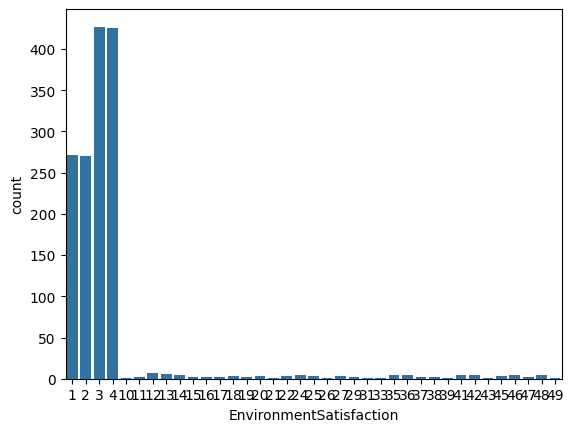

In [796]:
# Miramos la distribución que tienen estos datos con los outliers

sns.countplot(x='EnvironmentSatisfaction', data=df);


In [797]:
# Contamos cuántos registros están por encima de 4

df[df['EnvironmentSatisfaction'] >4]['Age'].count()

92

In [798]:
# Contamos porcentaje de registros por encima de 4

round(df[df['EnvironmentSatisfaction'] >4]['Age'].count()/df.shape[0]*100,1)

6.2

In [799]:
# Convertimos a nulos los datos mayores que 4 puesto que sabemos que son valores erróneos y distorsionan los gráficos y los
# estadísticos

df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].apply(lambda x: np.nan if x > 4 else x)


In [800]:
# Comprobamos que es correcto

df['EnvironmentSatisfaction'].unique()

array([ 1.,  3.,  4.,  2., nan])

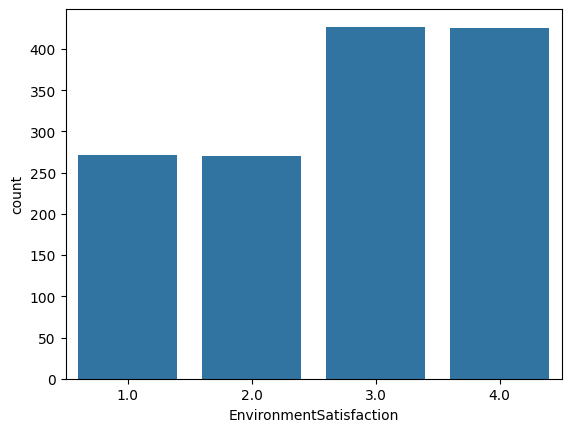

In [801]:
# hacemos un diagrana de barras para ver la distribución de los datos

sns.countplot(x='EnvironmentSatisfaction', data=df);


In [802]:
# Calculamos los estadísticos

df['EnvironmentSatisfaction'].describe()

count    1394.000000
mean        2.723099
std         1.095942
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

In [803]:
# Calculamos la moda

moda = df['EnvironmentSatisfaction'].mode()[0]
moda

# Moda y mediana coinciden. Dado el porcentaje de nulos, la distribución de los datos  y que ambos estadísiticos coinciden 
# imputamos con la moda

3.0

In [804]:
# Imputamos la moda a los nulos

df['EnvironmentSatisfaction']=df['EnvironmentSatisfaction'].fillna(moda)

In [805]:
# Comprobamos que no tenemos nulos

df['EnvironmentSatisfaction'].unique()

array([1., 3., 4., 2.])

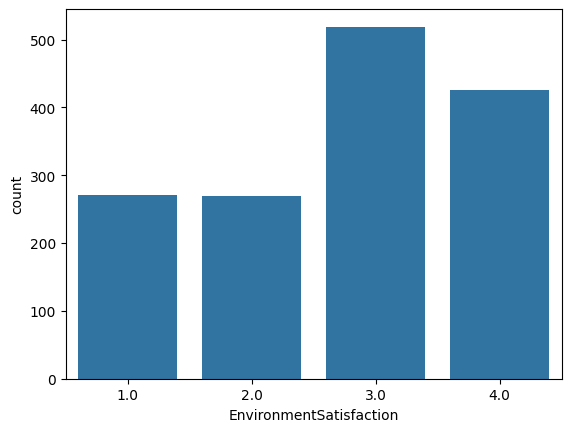

In [806]:
# Comprobamos la distribución de los datos

sns.countplot(x='EnvironmentSatisfaction', data=df);


In [807]:
# Comprobamos que la variación de los estadísticos es asumible

df['EnvironmentSatisfaction'].describe()

# Tenemos ligeras variaciones en mean y desviación estandar que consideramos aceptables

count    1486.000000
mean        2.740242
std         1.063548
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: EnvironmentSatisfaction, dtype: float64

### Imputación WorkLifeBalance 

In [808]:
# Visualizamos los valores de la variable

df['WorkLifeBalance'].unique()

<IntegerArray>
[3, <NA>, 2, 4, 1]
Length: 5, dtype: Int64

In [809]:
# Calculamos el número de nulos

df['WorkLifeBalance'].isnull().sum()

97

In [810]:
# Calculamos el porcentaje de nulos

porcentaje_nulos(df).loc['WorkLifeBalance']

El porcentaje de nulos que tenemos en el DataFrame es ==>


% Nulos    6.53
Name: WorkLifeBalance, dtype: float64

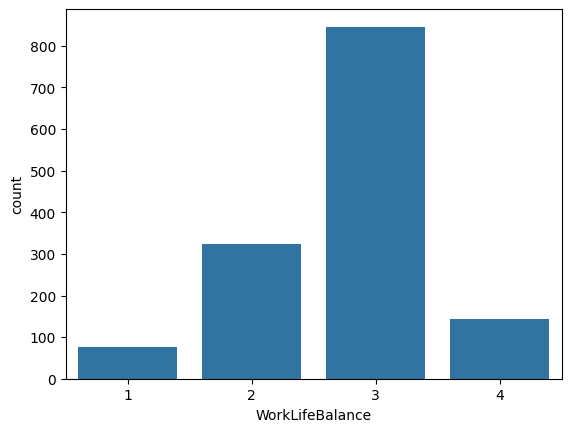

In [811]:
# Hacemos un diagrama de barras para ver la distribución de los datos

sns.countplot(x='WorkLifeBalance', data=df);

In [812]:
# Obtenemos los principales estadísticos de la variable

round(df['WorkLifeBalance'].describe(), 2)


count    1389.0
mean       2.76
std        0.71
min         1.0
25%         2.0
50%         3.0
75%         3.0
max         4.0
Name: WorkLifeBalance, dtype: Float64

In [813]:
# Calculamos la moda

moda = df['WorkLifeBalance'].mode()[0]
moda

# Moda y mediana coinciden. Ambos valores son válidos para imputar los nulos dado el bajo porcentaje de nulos

3

In [814]:
# Imputamos los nulos con la moda

df['WorkLifeBalance'] = df['WorkLifeBalance'].fillna(moda)


In [815]:
# Comprobamos que los nulos se han sustituido

df['WorkLifeBalance'].unique()

<IntegerArray>
[3, 2, 4, 1]
Length: 4, dtype: Int64

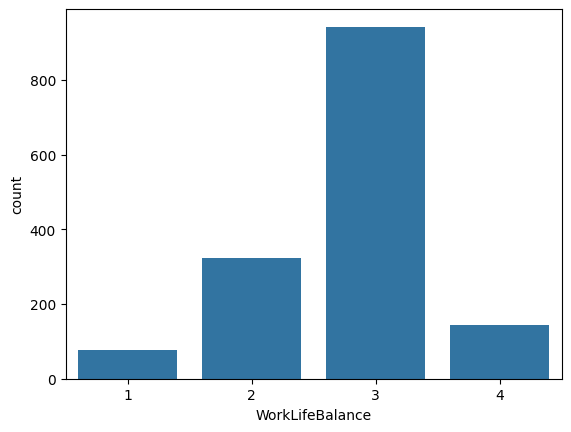

In [816]:
# Hacemos el diagrama de barras para ver como queda

sns.countplot(x='WorkLifeBalance', data=df);

In [817]:
# Calculamos los principales estadísticos

round(df['WorkLifeBalance'].describe(), 2)

# Los valores de los estadísticos apenas se han modificado así que considermos válida la imputación

count    1486.0
mean       2.78
std        0.69
min         1.0
25%         2.0
50%         3.0
75%         3.0
max         4.0
Name: WorkLifeBalance, dtype: Float64

### Imputación PerformanceRating

In [818]:
# Calculamo los nulos en la columna

porcentaje_nulos(df).loc['PerformanceRating']


El porcentaje de nulos que tenemos en el DataFrame es ==>


% Nulos    12.05
Name: PerformanceRating, dtype: float64

In [819]:
# Vemos como se distribuyen los valores de la variable

df['PerformanceRating'].value_counts()


PerformanceRating
3    1102
4     205
Name: count, dtype: Int64

In [820]:
# Calculamos los principales estadísticos

round(df['PerformanceRating'].describe(),2)

# Como se puede ver con la distribución de los datos que hemos calculado moda y mediana coinciden.


count    1307.0
mean       3.16
std        0.36
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         4.0
Name: PerformanceRating, dtype: Float64

In [821]:
# Probamos a imputar con la mediana

mediana=df['PerformanceRating'].median()

df['PerformanceRating'] = df['PerformanceRating'].fillna(mediana)

# Calculamos la distribución tras la imputación, verificando así además que la imputación se ha relaizado

df['PerformanceRating'].value_counts()

# La imputación se ha efectuado de forma correcta

PerformanceRating
3    1281
4     205
Name: count, dtype: Int64

In [822]:
# Calculamos los principales estadísticos para ver cómo han cambiado tras la imputación

round(df['PerformanceRating'].describe(),2)

# Todos los estadisticos permenecen igual salvo media y desviación estándar que se han modificado 2 décimas. Dado que la 
# modificación es mínima consideramos la imputación aceptable

count    1486.0
mean       3.14
std        0.34
min         3.0
25%         3.0
50%         3.0
75%         3.0
max         4.0
Name: PerformanceRating, dtype: Float64

In [823]:
# aquí guardamos la versión actual del archivo .csv para no tener que repetir los pasos hasta aquí, si hubiera algún problema

df.to_csv("data/HR RAW DATA_v01.csv")

In [824]:
# y añadimos una celda para importarlo de nuevo en caso de necesidad

df=pd.read_csv("data/HR RAW DATA_v01.csv", index_col=0)
df.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes


### Imputación MonthlyIncome

In [825]:
# Calculamos el número de nulos

df["MonthlyIncome"].isna().sum()

785

In [826]:
# Recordamos el porcentaje de nulos

porcentaje_nulos(df).loc['MonthlyIncome']

# Dado que el porcentaje de nulos supera el 50%, debemos tener en cuenta
# en las operaciones y conclusiones que se alcancen con esta variable, 
# ya que es probable que no representen fidedignamente los valores reales

El porcentaje de nulos que tenemos en el DataFrame es ==>


% Nulos    52.83
Name: MonthlyIncome, dtype: float64

In [827]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1486 entries, 0 to 1611
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            1486 non-null   object 
 1   Age                       1486 non-null   int64  
 2   Gender                    1486 non-null   object 
 3   Education                 1486 non-null   int64  
 4   EducationField            793 non-null    object 
 5   NumCompaniesWorked        1486 non-null   int64  
 6   JobLevel                  1486 non-null   int64  
 7   JobRole                   1486 non-null   object 
 8   Department                1486 non-null   object 
 9   JobInvolvement            1486 non-null   int64  
 10  PerformanceRating         1486 non-null   int64  
 11  Attrition                 1486 non-null   object 
 12  JobSatisfaction           1486 non-null   int64  
 13  EnvironmentSatisfaction   1486 non-null   float64
 14  RelationshipS

In [828]:
# Obtenemos los principales estadísticos

df["MonthlyIncome"].describe()

# La distribución de esta variable también está muy escorada a la izquierda, es decir unos cuantos salarios altos, y algunos 
# outliers hacen que la mediana represente mejor al conjunto de datos. 
# Vamos a explorar un poco más la variable a ver cual es la manera más razonable para imputar

# vemos que entre el salario minimo y el máximo hay aproximadamente 19.000 unidades (no tenemos unidades, podrían ser € o $, o cualquier
# otra moneda)

count      701.000000
mean      6513.833096
std       4820.531819
min       1009.000000
25%       2904.000000
50%       4805.000000
75%       8376.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

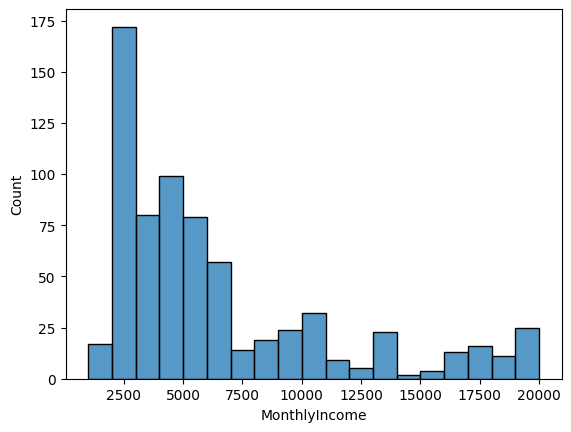

In [829]:
# Vamos a hacer un histograma con 19 bins

sns.histplot(data=df, x="MonthlyIncome", bins= 19)
#sns.histplot(data=df, x="Education", bins= 50, kde= True, stat="percent", hue="Gender", ax=axes[0,1])
#sns.histplot(data=df, x="JobLevel", bins= 50, kde= True, stat="percent", hue="Gender", ax=axes[0,2])
#sns.histplot(data=df, x="Age", bins= 50, kde= True, stat="percent", hue="Gender",ax=axes[1,0])
#sns.countplot(data=df, x="Education", bins= 50, kde= True, stat="percent", ax=axes[1,0])
#sns.histplot(data=df, x="JobSatisfaction", bins= 50, kde= True, stat="percent", ax=axes[1,2])
#sns.boxplot(data=df, x="MonthlyIncome", ax=axes[1,1]);

#hue="JobSatisfaction",

In [830]:
# A continuación realizamos pruebas con la columna "MonthlyIncome" completa, sin ningún tipo de clasificación, para explorar varios métodos 
# de imputación: simpleImputer con mean y median, KnnImputer e IterativeImputer.
# Ninguno de estos métodos arrojó resultados con los que estuvieramos satifechas.

# Decidimos explorar qué variables influían en el "MonthlyIncome" para imputar en función de los grupos resultantes

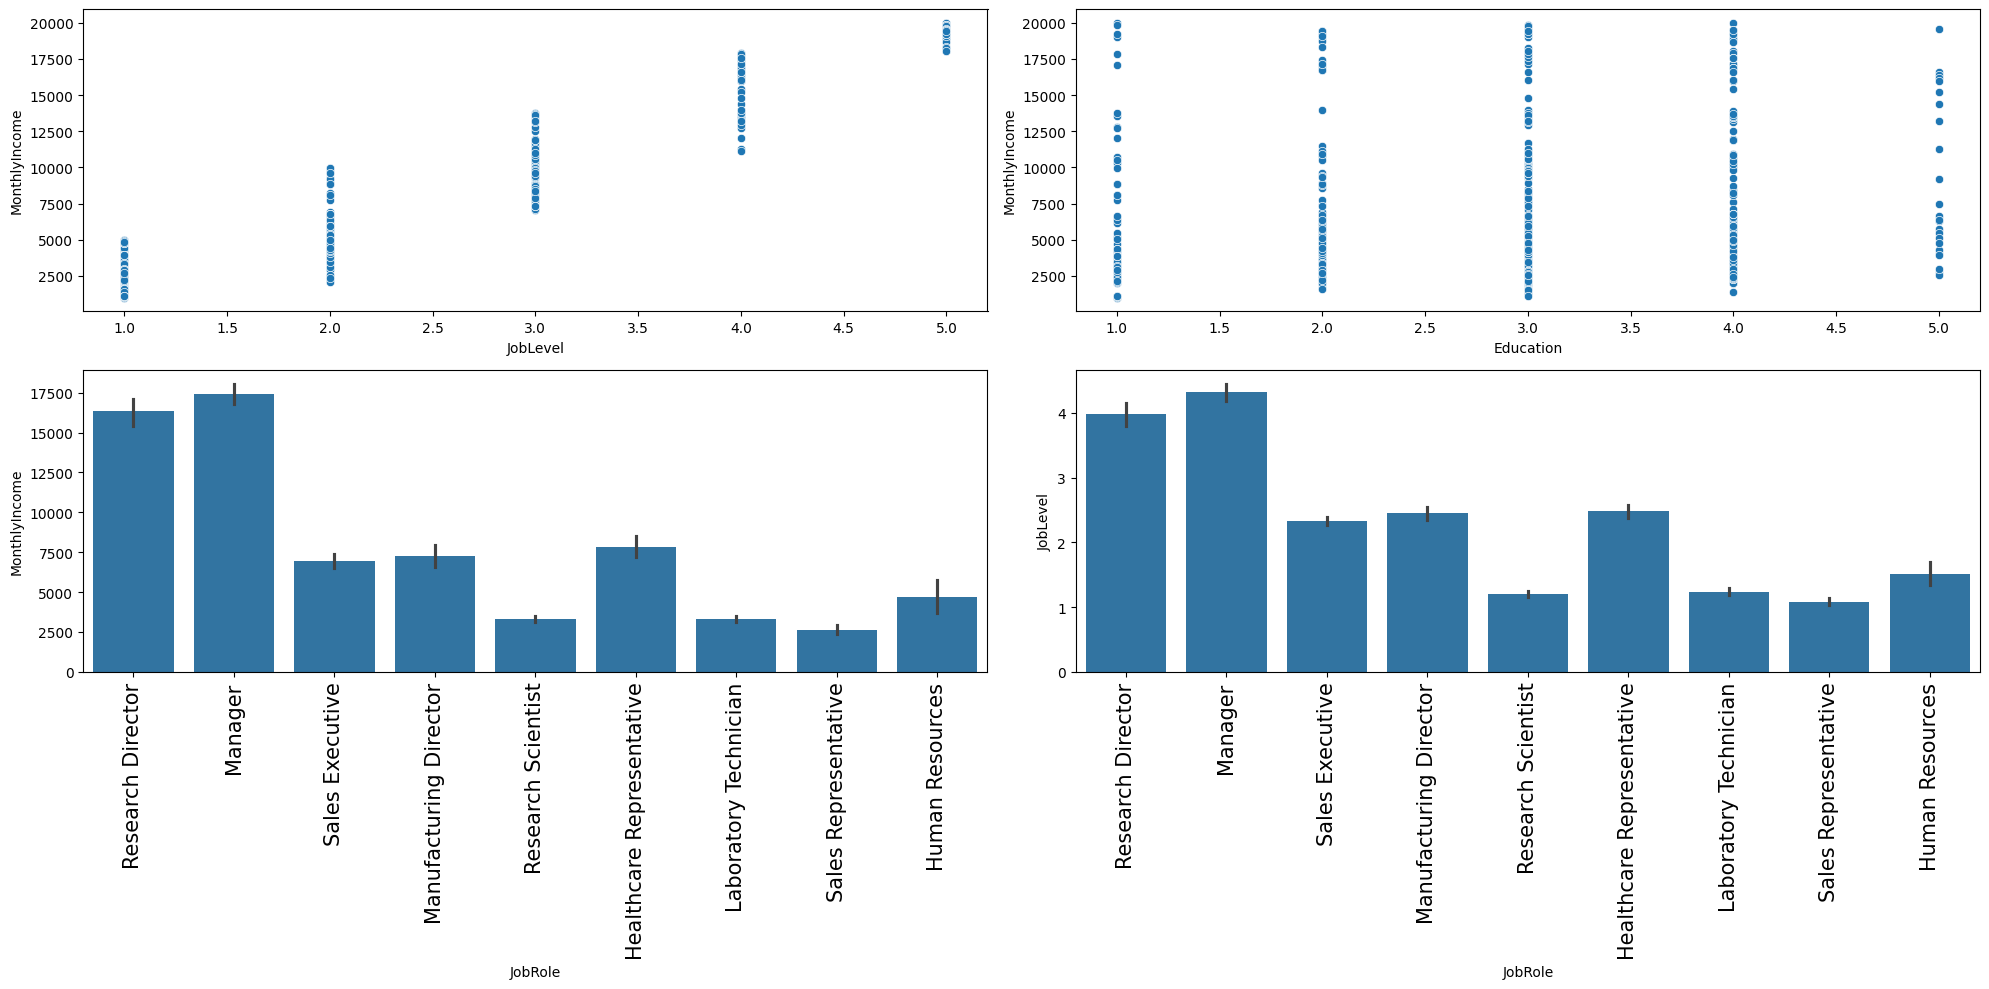

In [831]:
# Tras una inspección visual y consultar con la PO, las más relevantes con las que podemos agrupar son "JobLevel", y "Education", 
# ambas son variables numéricas, igual que "MonthlyIncome", y también con "JobRole" que es categórica

# Hacemos unas figuras para ver las relaciones

figs, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))

sns.scatterplot(data=df, x="JobLevel", y="MonthlyIncome", ax=axes[0,0])
sns.scatterplot(data=df, x="Education", y="MonthlyIncome", ax=axes[0,1])
sns.barplot(data=df, x="JobRole", y="MonthlyIncome", ax=axes[1,0])
sns.barplot(data=df, x="JobRole", y="JobLevel", ax=axes[1,1])

axes[1,0].tick_params(axis='x', rotation=90, labelsize=15)
axes[1,1].tick_params(axis='x', rotation=90, labelsize=15)

# PONER TÍTULOS EN ESTAS GRÁFICAS

plt.tight_layout();

# Vemos que JobLevel y MonthlyIncome están correlacionadas, es decir, a mayor nivel mayor income, pero hay bastante dispersión 
# dentro de cada nivel.

# Education no está correlacionada, hay una gran dispersion de salarios para cada nivel de educación

# JobRole está claramente correlacionada con MonthlyIncome, a pesar de que haya también una pequeña variación. También hay 
# correlación entre JobRole y Joblevel, pero también con algo de dispersión



In [832]:
# Tras consultar con la PO, hemos decidido clasificar al personal por JobRole, calcular el % de nulos en cada grupo y en 
# función de eso, hacer una imputación simple con la media/mediana o usar un método de imputación complejo (KNN)

# Agrupar por 'JobLevel' y 'JobRole' y calcular los descriptivos de 'MonthlyIncome'
df_a = df.groupby(['JobLevel', 'JobRole'])["MonthlyIncome"].agg(["count", "mean", "std", "min", "max", "median"]).reset_index()

# Calcular el porcentaje de nulos para cada combinación de 'JobLevel' y 'JobRole'
df_nulls = df.groupby(['JobLevel', 'JobRole'])["MonthlyIncome"].apply(lambda x: x.isnull().mean() * 100).reset_index(name="%_nulos")

# Unir ambos DataFrames (descriptivos y porcentaje de nulos)
df_resultado = pd.merge(df_a, df_nulls, on=['JobLevel', 'JobRole'])

# Mostrar el DataFrame resultante
display(round(df_resultado),2)

# Vemos que hay, en total, 26 combinaciones de 'JobLevel' y 'JobRole', es decir, en cada 'JobLevel' se incluyen varias categorías de
# 'JobRole', habiendo en algunos casos importantes diferencias de salario entre un 'JobRole' de un 'JobLevel' y el mismo 'JobRole' en
# los siguientes 'JobLevel's. Como ejemplo se pueden inspeccionar los salarios del personal en Human Resources en los diferentes niveles 

,JobLevel,JobRole,count,mean,std,min,max,median,%_nulos
0,1,Human Resources,10,2870.0,657.0,2064.0,4323.0,2772.0,70.0
1,1,Laboratory Technician,93,2902.0,809.0,1129.0,4876.0,2705.0,54.0
2,1,Research Scientist,124,2912.0,766.0,1009.0,4968.0,2724.0,48.0
3,1,Sales Representative,40,2415.0,637.0,1052.0,4400.0,2422.0,47.0
4,2,Healthcare Representative,35,5773.0,1185.0,4000.0,8853.0,5933.0,56.0
5,2,Human Resources,7,5316.0,1070.0,3886.0,6410.0,5204.0,46.0
6,2,Laboratory Technician,31,4366.0,1250.0,2176.0,6674.0,4444.0,45.0
7,2,Manufacturing Director,41,5669.0,1387.0,4197.0,9957.0,5265.0,54.0
8,2,Research Scientist,31,4763.0,998.0,2372.0,6646.0,4735.0,47.0
9,2,Sales Executive,102,5644.0,1313.0,4001.0,9924.0,5400.0,57.0


2

In [833]:
job_role_list= df["JobRole"].unique().tolist()
job_role_list

['Research Director',
 'Manager',
 'Sales Executive',
 'Manufacturing Director',
 'Research Scientist',
 'Healthcare Representative',
 'Laboratory Technician',
 'Sales Representative',
 'Human Resources']

In [834]:
# Crear DFs individuales para cada JobRole y poder calcular % nulos y descriptivos
# NOTA: hemos usado estas abreviaturas: 
# 'Research Director':RD, 'Manager': M, 'Sales Executive':SE, 'Manufacturing Director':MD, 'Research Scientist':RS,
#  'Healthcare Representative': HRep, 'Laboratory Technician':LT, 'Sales Representative': SRep, 'Human Resources':HR]

df_RD = df[df["JobRole"]=='Research Director']
print(f'Hay {df_RD.shape[0]} personas con el JobRole de "Research Director"')

df_M= df[df["JobRole"]=='Manager']
print(f'Hay {df_M.shape[0]} personas con el JobRole de "Manager"')

df_SE= df[df["JobRole"]=='Sales Executive']
print(f'Hay {df_SE.shape[0]} personas con el JobRole de "Sales Executive"')

df_MD= df[df["JobRole"]=='Manufacturing Director']
print(f'Hay {df_MD.shape[0]} personas con el JobRole de "Manufacturing Director"')

df_RS= df[df["JobRole"]=='Research Scientist']
print(f'Hay {df_RS.shape[0]} personas con el JobRole de "Research Scientist"')

df_HRep= df[df["JobRole"]=='Healthcare Representative']
print(f'Hay {df_HRep.shape[0]} personas con el JobRole de "Healthcare Representative"')

df_LT= df[df["JobRole"]=='Laboratory Technician']
print(f'Hay {df_LT.shape[0]} personas con el JobRole de "Laboratory Technician"')

df_SRep= df[df["JobRole"]=='Sales Representative']
print(f'Hay {df_SRep.shape[0]} personas con el JobRole de "Sales Representative"')

df_HR= df[df["JobRole"]=='Human Resources']
print(f'Hay {df_HR.shape[0]} personas con el JobRole de "Human Resources"')

Hay 80 personas con el JobRole de "Research Director"
Hay 103 personas con el JobRole de "Manager"
Hay 329 personas con el JobRole de "Sales Executive"
Hay 145 personas con el JobRole de "Manufacturing Director"
Hay 297 personas con el JobRole de "Research Scientist"
Hay 136 personas con el JobRole de "Healthcare Representative"
Hay 260 personas con el JobRole de "Laboratory Technician"
Hay 83 personas con el JobRole de "Sales Representative"
Hay 53 personas con el JobRole de "Human Resources"


In [835]:
# Calcular el % de nulos en "MonthlyIncome" para cada categoría

# Creamos un diccionario que mapea cada JobRole con su correspondiente DataFrame
JobRole_Dicc = {'Research Director':df_RD , 'Manager':df_M , 'Sales Executive':df_SE, 'Manufacturing Director':df_MD, 
                'Research Scientist':df_RS, 'Healthcare Representative': df_HRep, 'Laboratory Technician':df_LT, 
                'Sales Representative':df_SRep , 'Human Resources':df_HR}

# Iterar sobre el diccionario para calcular los % de nulos
print("Porcentajes de nulos en 'MonthlyIncome' por categoría en 'JobRole'")
print("-------------------------")
for job_role, df in JobRole_Dicc.items():
    # Calcular el porcentaje de nulos en la columna "MonthlyIncome"
    porcentaje_nulos = round(df['MonthlyIncome'].isnull().sum() / df.shape[0] * 100, 2) 
 
    # Mostrar el JobRole y el porcentaje de nulos
    print(f"{job_role}: {porcentaje_nulos}%")


# Las 9 categorías tienen un alto porcentaje de nulos, no inferior al 45%.

Porcentajes de nulos en 'MonthlyIncome' por categoría en 'JobRole'
-------------------------
Research Director: 48.75%
Manager: 54.37%
Sales Executive: 56.84%
Manufacturing Director: 55.86%
Research Scientist: 47.47%
Healthcare Representative: 54.41%
Laboratory Technician: 51.92%
Sales Representative: 46.99%
Human Resources: 62.26%


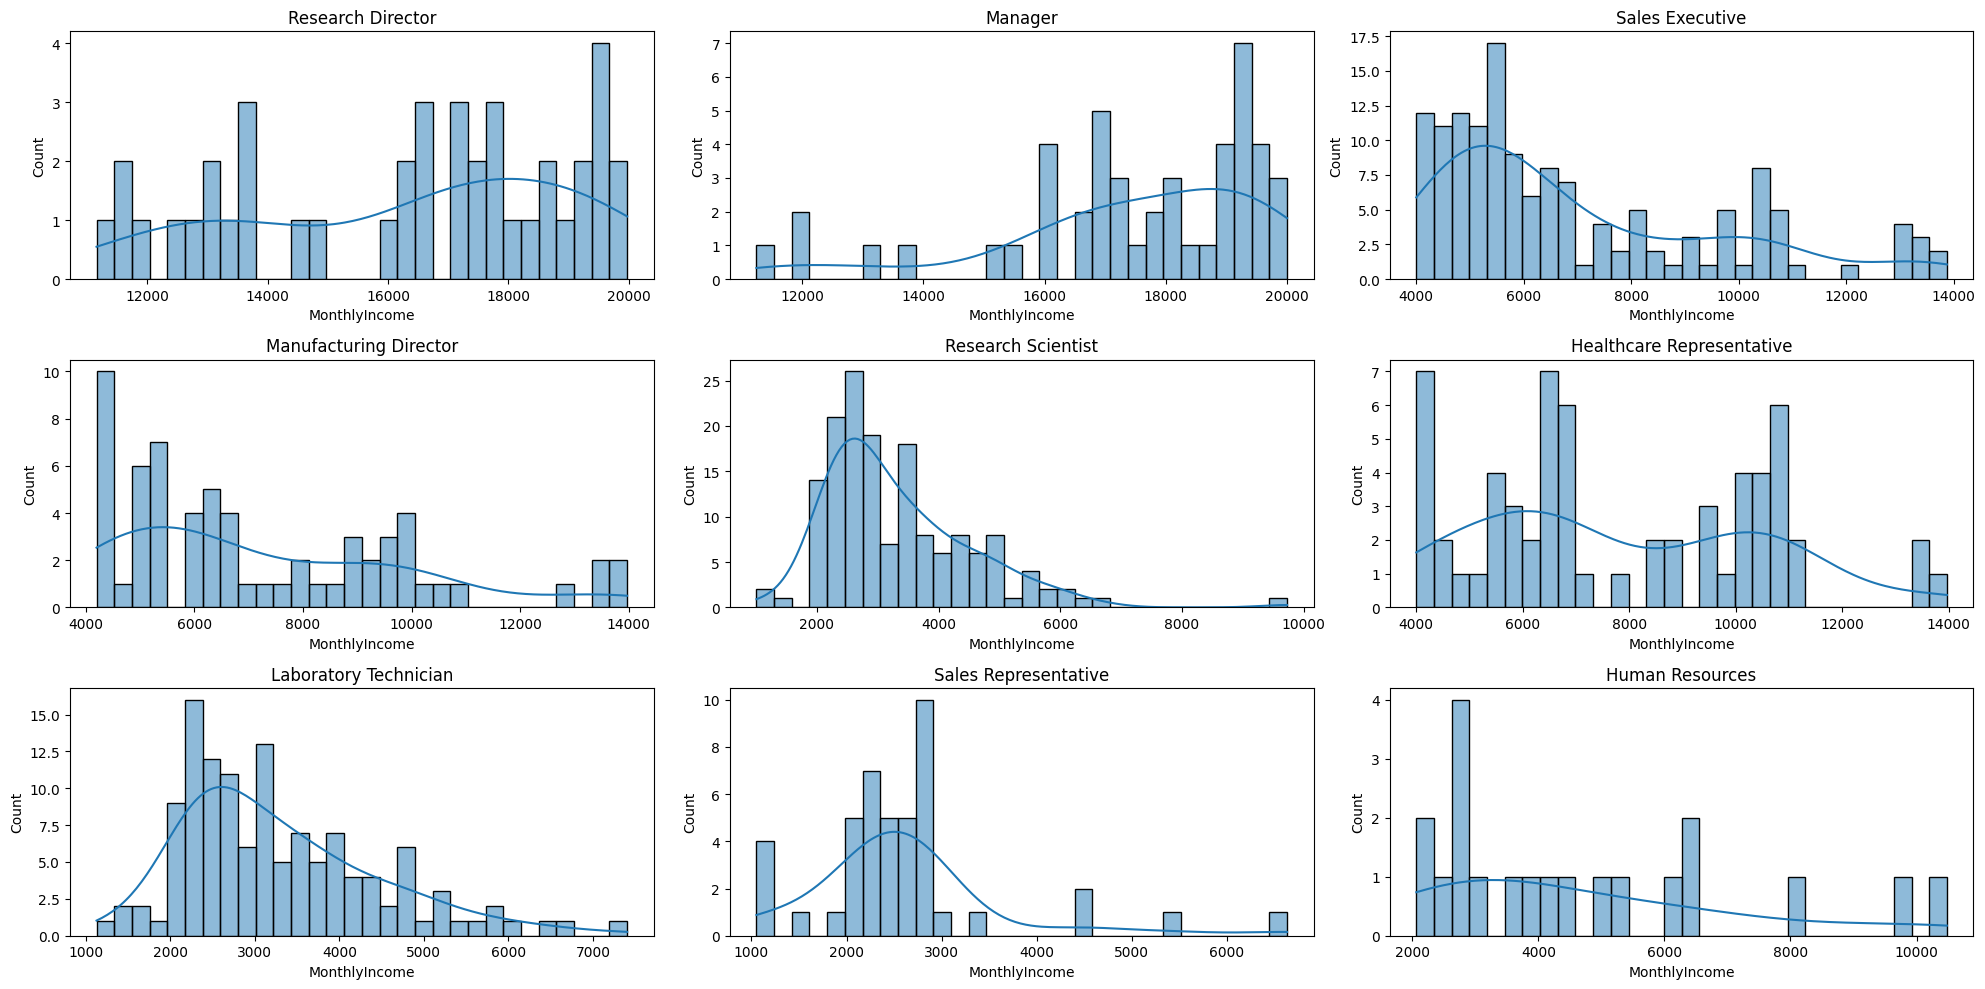

In [836]:
# Realizamos unos histogramas para poder ver los rangos de salarios para cada JobRole
figs, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,10))

sns.histplot(data=df_RD, x="MonthlyIncome", kde=True, bins=30,ax=axes[0,0])
sns.histplot(data=df_M, x="MonthlyIncome", kde=True,bins=30, ax=axes[0,1])
sns.histplot(data=df_SE, x="MonthlyIncome", kde=True,bins=30, ax=axes[0,2])
sns.histplot(data=df_MD, x="MonthlyIncome", kde=True,bins=30, ax=axes[1,0])
sns.histplot(data=df_RS, x="MonthlyIncome", kde=True,bins=30, ax=axes[1,1])
sns.histplot(data=df_HRep, x="MonthlyIncome", kde=True,bins=30, ax=axes[1,2])
sns.histplot(data=df_LT, x="MonthlyIncome", kde=True,bins=30, ax=axes[2,0])
sns.histplot(data=df_SRep, x="MonthlyIncome", kde=True,bins=30, ax=axes[2,1])
sns.histplot(data=df_HR, x="MonthlyIncome", kde=True,bins=30, ax=axes[2,2])

axes[0,0].set_title("Research Director")
axes[0,1].set_title("Manager")
axes[0,2].set_title("Sales Executive")
axes[1,0].set_title("Manufacturing Director")
axes[1,1].set_title("Research Scientist")
axes[1,2].set_title("Healthcare Representative")
axes[2,0].set_title("Laboratory Technician")
axes[2,1].set_title("Sales Representative")
axes[2,2].set_title("Human Resources")

plt.tight_layout();


In [837]:
df=pd.read_csv("data/HR RAW DATA_v01.csv", index_col=0)
df.head(2)

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes


In [838]:
# A la vista de los rangos que muestran las figuras y el hecho de que ya sabemos que JobLevel también influye,
# decidimos hacer las clasificaciones por JobLevel, en lugar de por JobRole para ver si el resultado mejora

df_level1 = df[df["JobLevel"]==1]
print(f'Hay {df_level1.shape[0]} personas con el JobLevel 1')

df_level2 = df[df["JobLevel"]==2]
print(f'Hay {df_level2.shape[0]} personas con el JobLevel 2')

df_level3 = df[df["JobLevel"]==3]
print(f'Hay {df_level3.shape[0]} personas con el JobLevel 3')

df_level4 = df[df["JobLevel"]==4]
print(f'Hay {df_level4.shape[0]} personas con el JobLevel 4')

df_level5 = df[df["JobLevel"]==5]
print(f'Hay {df_level5.shape[0]} personas con el JobLevel 5')

Hay 547 personas con el JobLevel 1
Hay 540 personas con el JobLevel 2
Hay 221 personas con el JobLevel 3
Hay 108 personas con el JobLevel 4
Hay 70 personas con el JobLevel 5


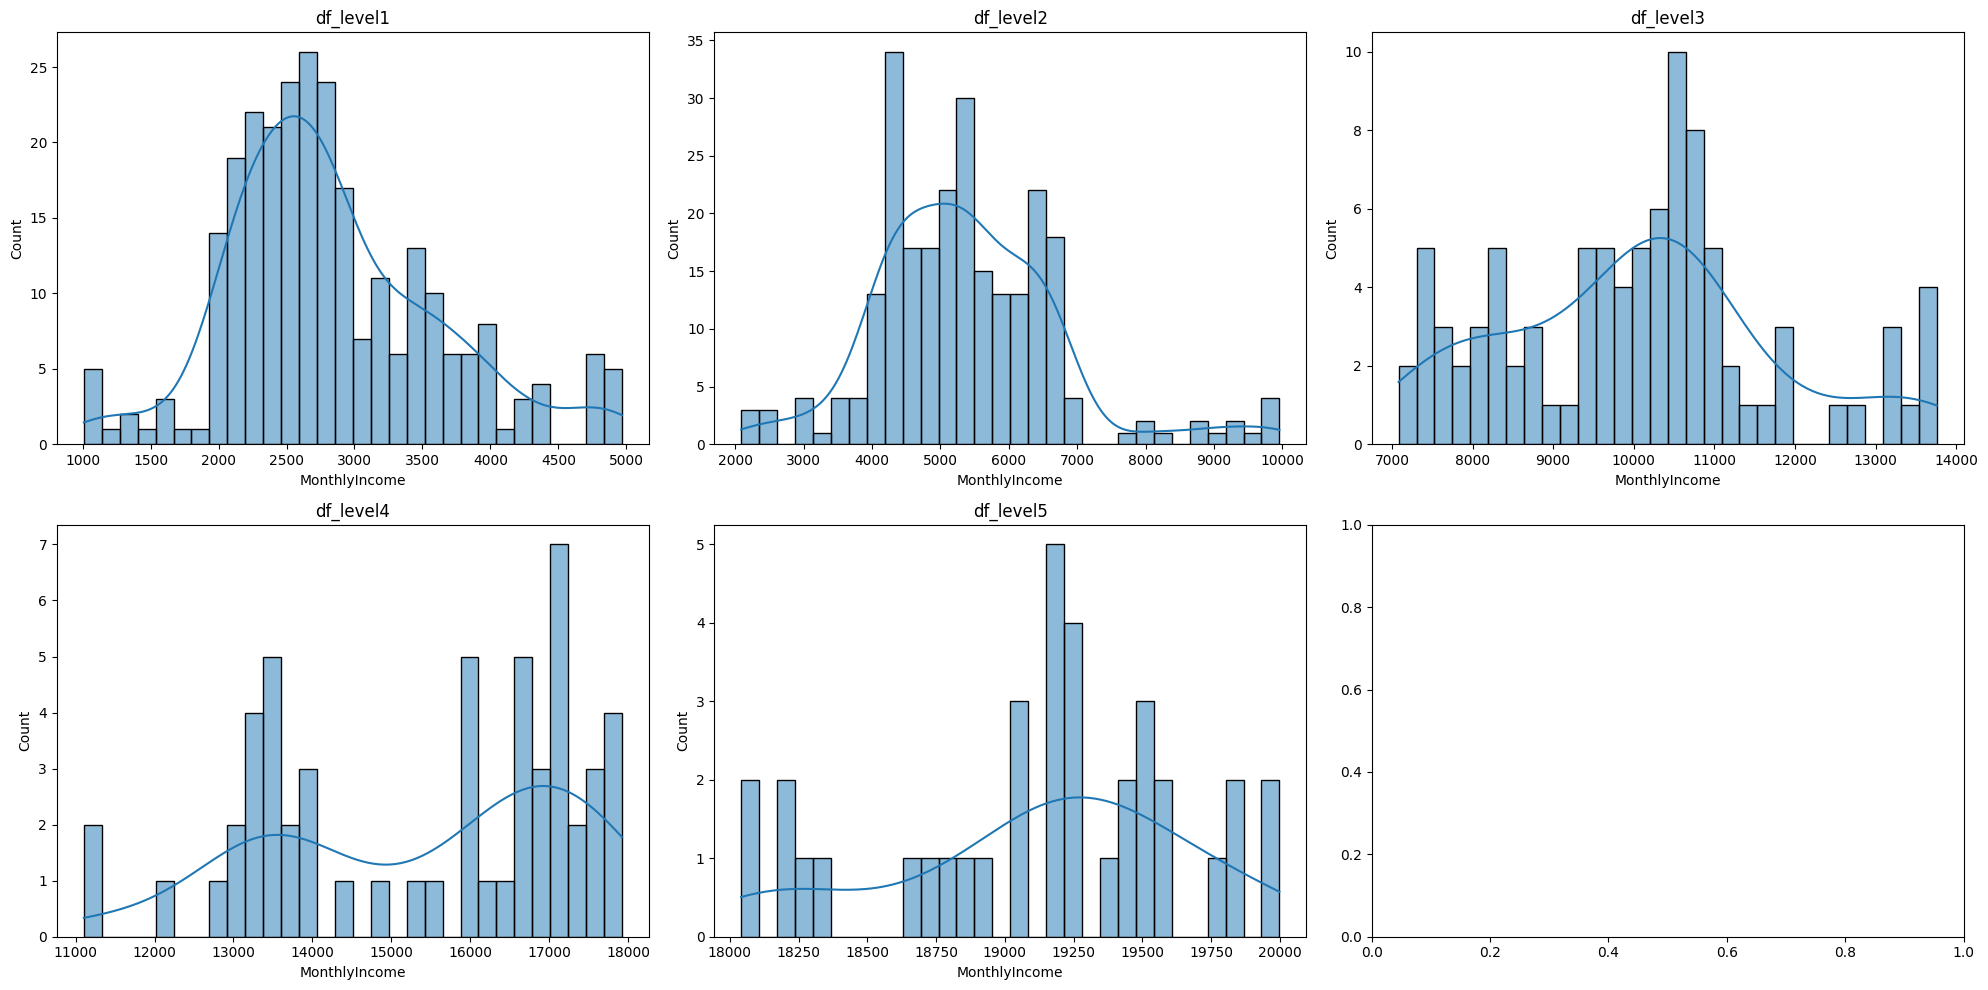

In [839]:
figs, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

sns.histplot(data=df_level1, x="MonthlyIncome", kde=True, bins=30,ax=axes[0,0])
sns.histplot(data=df_level2, x="MonthlyIncome", kde=True,bins=30, ax=axes[0,1])
sns.histplot(data=df_level3, x="MonthlyIncome", kde=True,bins=30, ax=axes[0,2])
sns.histplot(data=df_level4, x="MonthlyIncome", kde=True,bins=30, ax=axes[1,0])
sns.histplot(data=df_level5, x="MonthlyIncome", kde=True,bins=30, ax=axes[1,1])


axes[0,0].set_title("df_level1")
axes[0,1].set_title("df_level2")
axes[0,2].set_title("df_level3")
axes[1,0].set_title("df_level4")
axes[1,1].set_title("df_level5")


plt.tight_layout();

# vemos que en general para todos los JobLevels pero sobre todo para el 1 y el 5, se reducen mucho los rangos 
# entre los salarios min y max

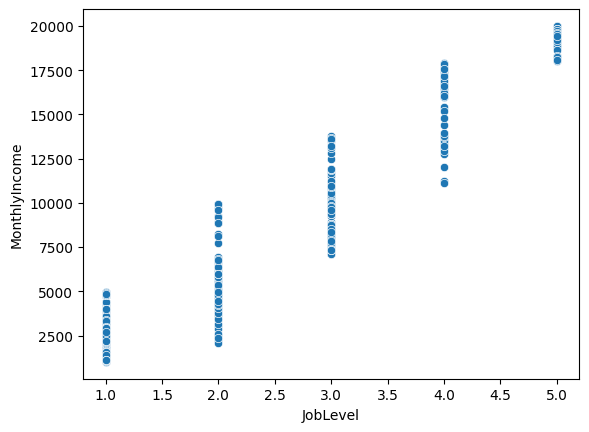

In [840]:
# Vemos de nuevo el scatterplot de relación entre JobLevel y MonthlyIncome

sns.scatterplot(data=df, x="JobLevel", y="MonthlyIncome");

In [841]:
round(df["MonthlyIncome"].describe(),2)

count      701.00
mean      6513.83
std       4820.53
min       1009.00
25%       2904.00
50%       4805.00
75%       8376.00
max      19999.00
Name: MonthlyIncome, dtype: float64

In [842]:
df["JobLevel"].value_counts()

JobLevel
1    547
2    540
3    221
4    108
5     70
Name: count, dtype: int64

In [843]:
#Creamos un df específico solo con las variables numéricas que vamos a valorar, además de JobRole

df_nums = df[["JobRole", "MonthlyIncome", "JobLevel", "Age", "Education"]]
df_nums.sample(10)


,JobRole,MonthlyIncome,JobLevel,Age,Education
272,Laboratory Technician,6074.0,2,34,3
899,Research Scientist,2654.0,1,45,2
978,Research Scientist,NaN,1,30,3
1307,Laboratory Technician,2127.0,1,24,2
614,Human Resources,4323.0,1,35,4
1611,Sales Executive,NaN,3,39,5
1217,Laboratory Technician,NaN,2,34,4
703,Sales Executive,NaN,2,26,2
188,Sales Executive,10400.0,3,32,4
1103,Healthcare Representative,NaN,2,36,4


In [844]:
# Evaluar varios tipos de imputación.
# 1: Métodos de imputación simples: Hemos probado con media y mediana, y no nos resuelven nada, 
# por lo que ya no mostraremos los resultados

# 2: Métodos de imputación complejos: 
# Hemos probado KNN con una variable de interés (feature): "JobRole"
# y KNN con dos features: ["JobRole" y "JobLevel"]

# hacemos una nueva copia del df con los datos limpios, para comparar los métodos antes de imputar nada
df_original = df_nums.copy() 

# 1. KNN Imputation SOLO POR JOBROLE
# feature=["JobRole"]
df_knn_imputed_1 = df_original.copy()
df_encoded_knn_1 = pd.get_dummies(df_knn_imputed_1, columns=["JobRole"], drop_first=True)

# Inicializar el imputer
imputer = KNNImputer(n_neighbors=5)

# Aplicar el imputer
df_imputed_knn_values_1 = pd.DataFrame(imputer.fit_transform(df_encoded_knn_1), columns=df_encoded_knn_1.columns)
df_knn_imputed_1["MonthlyIncome"] = df_imputed_knn_values_1["MonthlyIncome"]

# 2. KNN Imputation POR JOBROLE Y JOBLEVEL
# features: ["JobRole", "JobLevel"]
df_knn_imputed_2 = df_original.copy()
df_encoded_knn_2 = pd.get_dummies(df_knn_imputed_2, columns=["JobRole", "JobLevel"], drop_first=True)

# Initialize the imputer
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer
df_imputed_knn_values_2 = pd.DataFrame(imputer.fit_transform(df_encoded_knn_2), columns=df_encoded_knn_2.columns)
df_knn_imputed_2["MonthlyIncome"] = df_imputed_knn_values_2["MonthlyIncome"]

# 5. Crear el dataframe para comparar los valores obtenidos

comparison_df = pd.DataFrame({
    "Original": df_original["MonthlyIncome"],
    "KNN Imputed_1": df_knn_imputed_1["MonthlyIncome"],
    "KNN Imputed_2": df_knn_imputed_2["MonthlyIncome"]
})

# Display the first few rows to compare the imputation methods
round(comparison_df.describe(),2)

,Original,KNN Imputed_1,KNN Imputed_2
count,701.00,1442.00,1442.00
mean,6513.83,6451.43,6360.20
std,4820.53,4465.49,4248.25
min,1009.00,1009.00,1009.00
25%,2904.00,3143.05,3198.65
50%,4805.00,5102.40,5121.30
75%,8376.00,7683.60,7852.45
max,19999.00,19999.00,19999.00


In [845]:
comparison_df.shape

(1486, 3)

In [846]:
# Para poder valorar cómo cambian los estadísticos principales con cada uno de los métodos
# vamos a unir el df_combinado a una copia del df original y volver a hacer los grupos por JobRole 
# para ver los cambios en cada grupo, y los representaremos gráficamente
# 
# 1. Unir comparison_df al df original para ver los resultados de las imputaciones
# hacerlo en un df_copia, por si acaso

df_copia= df.copy()

df_combinado = df_copia.join(comparison_df)

df_combinado.head(2)


,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork,Original,KNN Imputed_1,KNN Imputed_2
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes,19537.0,19537.0,19537.0
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes,19999.0,19999.0,19999.0


In [847]:
# 2. Crear nuevos miniDFs para JobRole

# Utilizamos las mismas abreviaturas: 
# 'Research Director':RD, 'Manager': M, 'Sales Executive':SE, 'Manufacturing Director':MD, 'Research Scientist':RS,
#  'Healthcare Representative': HRep, 'Laboratory Technician':LT, 'Sales Representative': SRep, 'Human Resources':HR]

df_RD2 = df_combinado[df_combinado["JobRole"]=='Research Director']
print(f'Hay {df_RD2.shape[0]} personas con el JobRole de "Research Director"')

df_M2= df_combinado[df_combinado["JobRole"]=='Manager']
print(f'Hay {df_M2.shape[0]} personas con el JobRole de "Manager"')

df_SE2= df_combinado[df_combinado["JobRole"]=='Sales Executive']
print(f'Hay {df_SE2.shape[0]} personas con el JobRole de "Sales Executive"')

df_MD2= df_combinado[df_combinado["JobRole"]=='Manufacturing Director']
print(f'Hay {df_MD2.shape[0]} personas con el JobRole de "Manufacturing Director"')

df_RS2= df_combinado[df_combinado["JobRole"]=='Research Scientist']
print(f'Hay {df_RS2.shape[0]} personas con el JobRole de "Research Scientist"')

df_HRep2= df_combinado[df_combinado["JobRole"]=='Healthcare Representative']
print(f'Hay {df_HRep2.shape[0]} personas con el JobRole de "Healthcare Representative"')

df_LT2= df_combinado[df_combinado["JobRole"]=='Laboratory Technician']
print(f'Hay {df_LT2.shape[0]} personas con el JobRole de "Laboratory Technician"')

df_SRep2= df_combinado[df_combinado["JobRole"]=='Sales Representative']
print(f'Hay {df_SRep2.shape[0]} personas con el JobRole de "Sales Representative"')

df_HR2= df_combinado[df_combinado["JobRole"]=='Human Resources']
print(f'Hay {df_HR2.shape[0]} personas con el JobRole de "Human Resources"')


Hay 80 personas con el JobRole de "Research Director"
Hay 103 personas con el JobRole de "Manager"
Hay 329 personas con el JobRole de "Sales Executive"
Hay 145 personas con el JobRole de "Manufacturing Director"
Hay 297 personas con el JobRole de "Research Scientist"
Hay 136 personas con el JobRole de "Healthcare Representative"
Hay 260 personas con el JobRole de "Laboratory Technician"
Hay 83 personas con el JobRole de "Sales Representative"
Hay 53 personas con el JobRole de "Human Resources"


In [848]:
# 

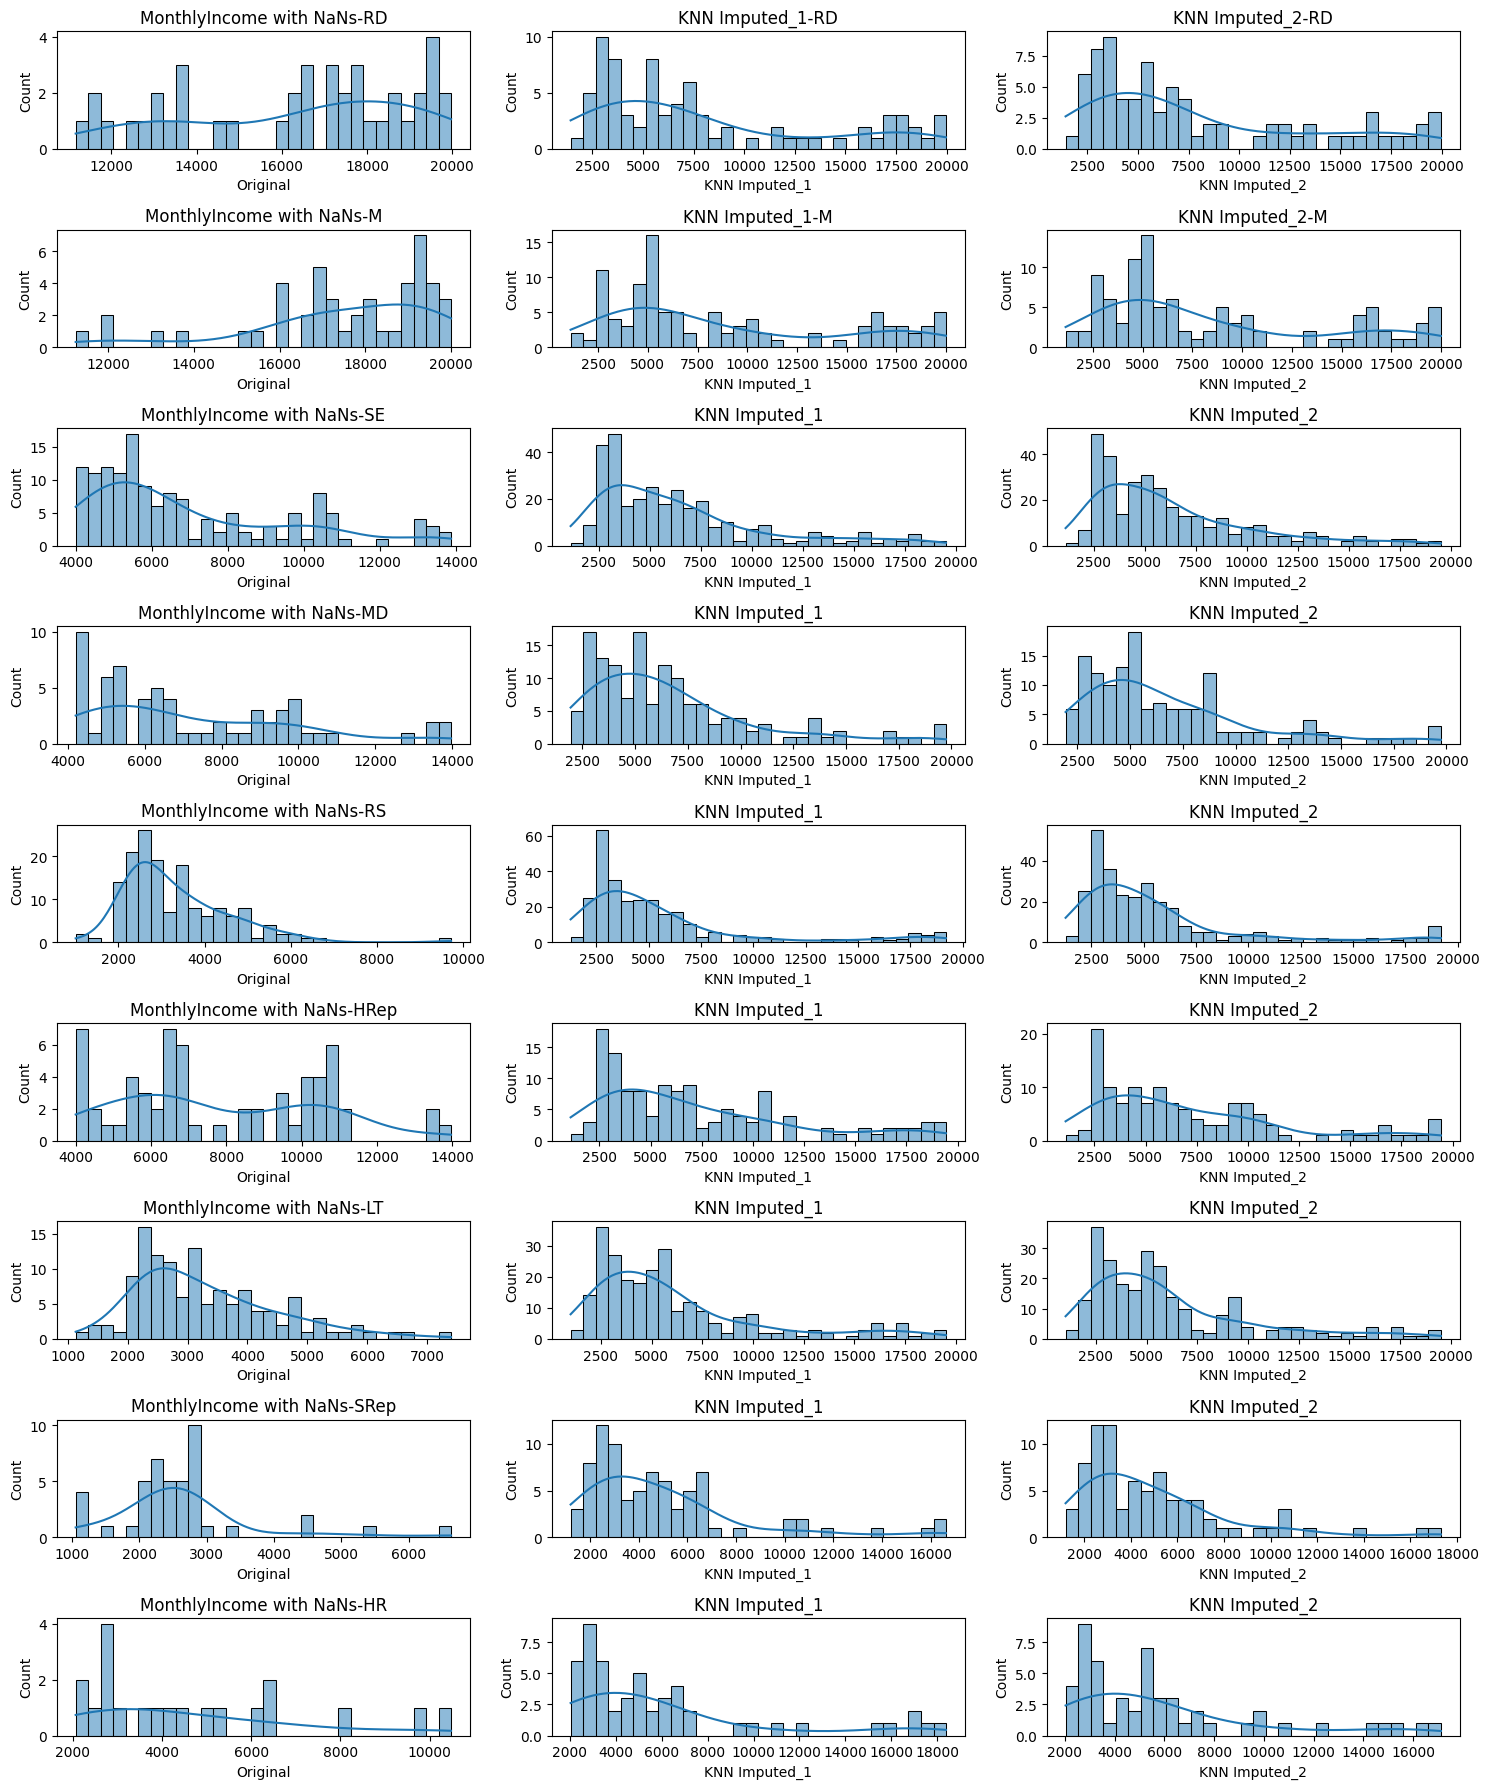

In [849]:
#mostrarlo gráficamente

figs, axes = plt.subplots(nrows=9, ncols=3, figsize=(15,18))

# 1. Research Director
sns.histplot(data=df_RD2, x="Original", kde=True, bins=30,ax=axes[0,0])
sns.histplot(data=df_RD2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[0,1])
sns.histplot(data=df_RD2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[0,2])


axes[0,0].set_title("MonthlyIncome with NaNs-RD")
axes[0,1].set_title("KNN Imputed_1-RD")
axes[0,2].set_title("KNN Imputed_2-RD")

#"Manager"
sns.histplot(data=df_M2, x="Original", kde=True, bins=30,ax=axes[1,0])
sns.histplot(data=df_M2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[1,1])
sns.histplot(data=df_M2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[1,2])


axes[1,0].set_title("MonthlyIncome with NaNs-M")
axes[1,1].set_title("KNN Imputed_1-M")
axes[1,2].set_title("KNN Imputed_2-M")


#"Sales Executive"
sns.histplot(data=df_SE2, x="Original", kde=True, bins=30,ax=axes[2,0])
sns.histplot(data=df_SE2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[2,1])
sns.histplot(data=df_SE2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[2,2])

axes[2,0].set_title("MonthlyIncome with NaNs-SE")
axes[2,1].set_title("KNN Imputed_1")
axes[2,2].set_title("KNN Imputed_2")


# "Manufacturing Director"
sns.histplot(data=df_MD2, x="Original", kde=True, bins=30,ax=axes[3,0])
sns.histplot(data=df_MD2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[3,1])
sns.histplot(data=df_MD2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[3,2])


axes[3,0].set_title("MonthlyIncome with NaNs-MD")
axes[3,1].set_title("KNN Imputed_1")
axes[3,2].set_title("KNN Imputed_2")


#"Research Scientist"
sns.histplot(data=df_RS2, x="Original", kde=True, bins=30,ax=axes[4,0])
sns.histplot(data=df_RS2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[4,1])
sns.histplot(data=df_RS2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[4,2])


axes[4,0].set_title("MonthlyIncome with NaNs-RS")
axes[4,1].set_title("KNN Imputed_1")
axes[4,2].set_title("KNN Imputed_2")


#"Healthcare Representative"
sns.histplot(data=df_HRep2, x="Original", kde=True, bins=30,ax=axes[5,0])
sns.histplot(data=df_HRep2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[5,1])
sns.histplot(data=df_HRep2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[5,2])


axes[5,0].set_title("MonthlyIncome with NaNs-HRep")
axes[5,1].set_title("KNN Imputed_1")
axes[5,2].set_title("KNN Imputed_2")


#"Laboratory Technician"
sns.histplot(data=df_LT2, x="Original", kde=True, bins=30,ax=axes[6,0])
sns.histplot(data=df_LT2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[6,1])
sns.histplot(data=df_LT2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[6,2])


axes[6,0].set_title("MonthlyIncome with NaNs-LT")
axes[6,1].set_title("KNN Imputed_1")
axes[6,2].set_title("KNN Imputed_2")


#"Sales Representative"
sns.histplot(data=df_SRep2, x="Original", kde=True, bins=30,ax=axes[7,0])
sns.histplot(data=df_SRep2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[7,1])
sns.histplot(data=df_SRep2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[7,2])


axes[7,0].set_title("MonthlyIncome with NaNs-SRep")
axes[7,1].set_title("KNN Imputed_1")
axes[7,2].set_title("KNN Imputed_2")


# "Human Resources"
sns.histplot(data=df_HR2, x="Original", kde=True, bins=30,ax=axes[8,0])
sns.histplot(data=df_HR2, x="KNN Imputed_1", kde=True,bins=30, ax=axes[8,1])
sns.histplot(data=df_HR2, x="KNN Imputed_2", kde=True,bins=30, ax=axes[8,2])


axes[8,0].set_title("MonthlyIncome with NaNs-HR")
axes[8,1].set_title("KNN Imputed_1")
axes[8,2].set_title("KNN Imputed_2")

plt.tight_layout();

# en el título de las figuras en la columna de la izquierda está incluida la abreviatura del JobRole, para poder diferenciarlos
# Se pueden hacer más modificaciones a las gráficas, o más adelante para hacer la presentación, sacar solo las que interesen

In [850]:
# Ver como queda el df de comparación de todas las combinaciones de niveles y roles, que ya hicimos antes, pero ahora con las 
# imputaciones

# Agrupar por 'JobLevel' y 'JobRole' y calcular los descriptivos de 'MonthlyIncome' con los nulos
df_MIncome = df_combinado.groupby(['JobLevel', 'JobRole'])["MonthlyIncome"].agg(["count", "mean", "min", "max", "median"]).reset_index()
round(df_MIncome,1)



,JobLevel,JobRole,count,mean,min,max,median
0,1,Human Resources,10,2869.8,2064.0,4323.0,2772.5
1,1,Laboratory Technician,93,2902.2,1129.0,4876.0,2705.0
2,1,Research Scientist,124,2912.1,1009.0,4968.0,2724.0
3,1,Sales Representative,40,2415.4,1052.0,4400.0,2421.5
4,2,Healthcare Representative,35,5772.7,4000.0,8853.0,5933.0
5,2,Human Resources,7,5315.9,3886.0,6410.0,5204.0
6,2,Laboratory Technician,31,4366.2,2176.0,6674.0,4444.0
7,2,Manufacturing Director,41,5668.9,4197.0,9957.0,5265.0
8,2,Research Scientist,31,4762.6,2372.0,6646.0,4735.0
9,2,Sales Executive,102,5643.7,4001.0,9924.0,5400.5


In [851]:
# Agrupar por 'JobLevel' y 'JobRole' y calcular los descriptivos de 'MonthlyIncome' con KNN Imputed_1
df_KNN_1 = df_combinado.groupby(['JobLevel', 'JobRole'])["KNN Imputed_1"].agg(["count", "mean", "min", "max", "median"]).reset_index()
round(df_KNN_1,1)



,JobLevel,JobRole,count,mean,min,max,median
0,1,Human Resources,33,6129.5,2088.0,17308.0,4636.2
1,1,Laboratory Technician,197,6243.9,1009.0,19517.0,4898.0
2,1,Research Scientist,230,5231.6,1274.0,19033.0,3811.0
3,1,Sales Representative,74,4900.0,1200.0,16627.0,4223.9
4,2,Healthcare Representative,75,6780.7,2088.0,19431.0,5201.8
5,2,Human Resources,13,6890.8,2029.0,18389.2,5237.2
6,2,Laboratory Technician,54,5581.9,1052.0,17630.6,5057.5
7,2,Manufacturing Director,88,5734.1,1943.2,16885.0,5259.7
8,2,Research Scientist,56,6598.4,2033.0,19197.0,4951.1
9,2,Sales Executive,224,6268.6,2121.0,19513.0,5236.7


In [852]:
# Agrupar por 'JobLevel' y 'JobRole' y calcular los descriptivos de 'MonthlyIncome' con KNN Imputed_2

df_KNN_2 = df_combinado.groupby(['JobLevel', 'JobRole'])["KNN Imputed_2"].agg(["count", "mean", "min", "max", "median"]).reset_index()
round(df_KNN_2,1)


,JobLevel,JobRole,count,mean,min,max,median
0,1,Human Resources,33,5911.7,2274.0,16184.0,4636.2
1,1,Laboratory Technician,197,6219.9,1009.0,19517.0,5006.0
2,1,Research Scientist,230,5247.8,1274.0,19033.0,4038.5
3,1,Sales Representative,74,4893.5,1200.0,17309.8,4132.5
4,2,Healthcare Representative,75,6672.6,2269.0,19431.0,5185.6
5,2,Human Resources,13,6873.0,2029.0,17123.0,5237.2
6,2,Laboratory Technician,54,5511.0,1052.0,14527.2,5074.5
7,2,Manufacturing Director,88,5836.8,1943.2,16885.0,5259.7
8,2,Research Scientist,56,6419.5,2033.0,19197.0,5088.1
9,2,Sales Executive,224,6133.6,2121.0,19513.0,5126.8


In [853]:
# Después de comparar con los valores de los MonthlyIncome en las 26 categorías decidimos 
# quedarnos con la imputación solo por JobRole (KNN_1) que sus descriptivos están más ajustados
# con el original

In [854]:
# Antes de sustituir la columna de "MonthlyIncome" con nulos, del df original, con la columna que tiene los valores imputados con KNN_1
# vamos a comprobar que los dos DFs estén bien alineados y coincidan los indices

if df.index.equals(df_combinado.index):
    print("Los índices están bien alineados.")
else:
    print("Los índices no coinciden.")

Los índices están bien alineados.


In [855]:
df.shape

(1486, 27)

In [856]:
# sustituir la columna de "MonthlyIncome" del df original (limpio) con los valores resultantes de la imputación 
# con KNN y "JobRole" y "JobLevel" 

df["MonthlyIncome"] = df_combinado["KNN Imputed_1"]

df.head(2)

#Y con esto hemos gestionado los nulos en la columna de "MonthlyIncome"

,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
0,"162,0",51,Male,3,NaN,7,5,Research Director,Unknown,3,3,No,3,1.0,3,3,19537.0,0,13,20,15,15,5,non-travel,6,No,Yes
1,"259,0",52,Male,4,Life Sciences,0,5,Manager,Unknown,2,3,No,3,3.0,1,3,19999.0,1,14,33,11,9,5,non-travel,1,No,Yes


In [857]:
# Comprobamos los nulos

df.isnull().sum()[df.isnull().sum()>0]

# Siguen quedando 44 nulos en MonthlyIncome

EducationField    693
MonthlyIncome      44
dtype: int64

In [858]:
# Hacemos un DataFrame con los registros en los que MonthLyIncome siguen siendo nulos

nulos_monthly_income= df[df.isnull()['MonthlyIncome']]
nulos_monthly_income.head(10)


,EmployeeNumber,Age,Gender,Education,EducationField,NumCompaniesWorked,JobLevel,JobRole,Department,JobInvolvement,PerformanceRating,Attrition,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,MonthlyIncome,StockOptionLevel,PercentSalaryHike,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,TrainingTimesLastYear,BusinessTravel,DistanceFromHome,OverTime,RemoteWork
1486,"1069,0",46,Male,4,Medical,9,5,Research Director,Unknown,3,3,No,4,4.0,4,3,NaN,2,17,2,2,2,0,non-travel,1,No,Yes
1488,"1135,0",31,Male,3,NaN,0,1,Sales Representative,Unknown,4,3,No,4,3.0,1,3,NaN,1,12,2,2,2,4,travel_frequently,20,No,No
1492,"1160,0",31,Male,3,Medical,1,1,Laboratory Technician,Research & Development,3,3,Yes,3,3.0,3,2,NaN,1,12,2,2,2,5,non-travel,15,No,No
1493,"1161,0",37,Female,2,NaN,7,2,Healthcare Representative,Unknown,2,3,No,4,3.0,3,3,NaN,2,13,6,1,3,2,travel_rarely,25,No,No
1494,"1162,0",27,Male,3,NaN,1,1,Research Scientist,Unknown,2,3,No,3,4.0,3,3,NaN,1,13,4,2,2,0,travel_rarely,6,No,No
1496,Unknown,56,Female,4,NaN,4,5,Manager,Unknown,3,3,No,1,4.0,4,3,NaN,1,13,5,4,2,2,non-travel,4,No,No
1504,Unknown,45,Female,4,NaN,4,2,Sales Executive,Unknown,3,4,No,3,3.0,2,4,NaN,2,22,8,5,7,3,non-travel,48,No,Yes
1506,"1869,0",46,Female,3,Life Sciences,5,3,Sales Executive,Unknown,3,4,Yes,2,3.0,3,3,NaN,3,21,8,0,7,2,non-travel,10,No,No
1509,"1911,0",42,Male,3,Medical,9,3,Research Director,Unknown,3,3,No,1,3.0,2,4,NaN,1,13,13,5,7,3,non-travel,6,No,No
1512,"423,0",31,Male,4,NaN,0,1,Research Scientist,Research & Development,3,3,No,4,3.0,3,3,NaN,1,12,5,0,3,4,travel_rarely,5,No,Yes


In [859]:
# Hacemos otro DataFrame con las mismas columnas con las que hemos imputado el MonthlyIncome

df_nulos = nulos_monthly_income.loc[:, ["JobRole", "MonthlyIncome", "JobLevel", "Age", "Education"]].sort_values(by='JobRole')
df_nulos.sample(10)


,JobRole,MonthlyIncome,JobLevel,Age,Education
1576,Human Resources,NaN,3,54,4
1488,Sales Representative,NaN,1,31,3
1582,Healthcare Representative,NaN,2,38,4
1595,Manufacturing Director,NaN,2,38,4
1541,Healthcare Representative,NaN,4,45,2
1603,Research Scientist,NaN,1,44,2
1519,Manufacturing Director,NaN,2,37,2
1512,Research Scientist,NaN,1,31,4
1548,Laboratory Technician,NaN,1,43,4
1515,Research Scientist,NaN,2,52,4


In [860]:
# Hacemos otro DataFrame para filtrar por las categorías Healthcare Representative y JobLevel = 2 dado que es una de las 
# categorías que aparecen en el DataFrame de arriba

df_HC_2 = df[(df['JobRole']== 'Healthcare Representative') & (df['JobLevel']== 2)].loc[:, ["JobRole", "MonthlyIncome", "JobLevel", "Age", "Education"]].sort_values(by=['JobRole', 'Education'])

df_HC_2.head()


,JobRole,MonthlyIncome,JobLevel,Age,Education
68,Healthcare Representative,6538.8,2,40,1
210,Healthcare Representative,6760.2,2,36,1
432,Healthcare Representative,4502.0,2,29,1
501,Healthcare Representative,18466.6,2,35,1
640,Healthcare Representative,8938.0,2,29,1


In [861]:
# Obtenemos el número de filas del DataFrame

df_HC_2.shape[0]


80

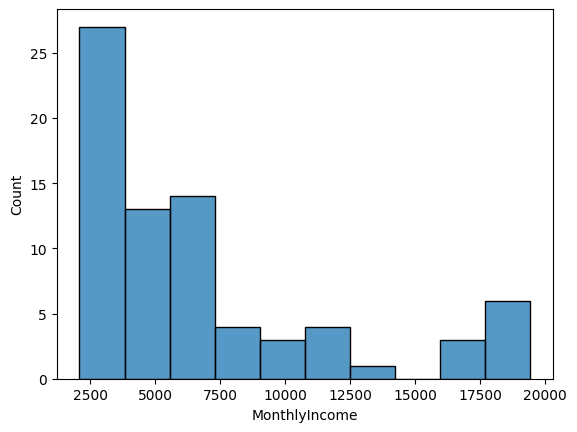

In [862]:
# Dibujamos un histograma para ver cómo es la distribución de los datos 

sns.histplot(data= df_HC_2, x= 'MonthlyIncome', bins=10);

# Tenemos sueldos prácticamente en todo el rango de datos. 

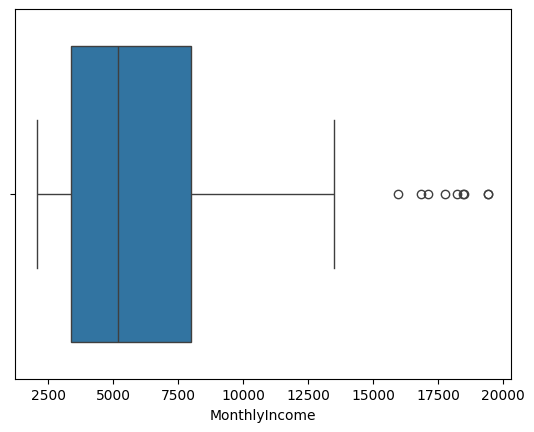

In [863]:
# Comprobamos la posible presencia de outliers

sns.boxplot(data=df_HC_2, x='MonthlyIncome');

# Efectivamente al menos los valores por encima de 15000 en principio se consideran outliers

# Puede que KNNImputer no esté imputando estos datos por la presencia de los outliers (no sabe qué imputar por proximidad 
# ante esta distribución) o por la falta de normalización de otras variables como Age. Es necesario estudiarlo en profundidad.


# 1.4 Conjunto de datos limpio

In [864]:
# Almacenamos los datos del DataFrame en un csv

df.to_csv('data/HR RAW DATA_CLEAN.csv')